# <h1><center>**`Employee Attrition Problem`**</center></h1>

### `Dataset Desciption`

The dataset folder contains the following files:

**train_dataset.csv** = 1000000 x 8

**train_salaries.csv** = 1000000 x 2

**test_dataset.csv** =  1000000 x 8

Columns Provided in the Dataset

1. **jobId** - Unique ID that indicates the employee
2. **companyId** - Unique ID that idicates the company
3. **jobType** - Shows which post the employee is working for the company
4. **degree** - shows which degree is completed by the employee
5. **major** - shows the field in which the employee is specialised in
6. **industry** - show the industry in which the employee is working
7. **yearsExperience** - years of working experience the employee is having
8. **milesFromMetropolis** - distance in miles between the comapny and his house
9. **salary** - salary given to the employee.
eg. 250 indicates 2,50,000 in dollars

In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm

In [2]:
# Load the train_dataset, train_salaries, test_dataset(pass your file path from drive)

train_data = pd.read_csv('train_dataset.csv')
train_data_salaries = pd.read_csv('train_salaries.csv')
test_data = pd.read_csv('test_dataset.csv')

In [3]:
# check the train data
train_data.head()




jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH               10                   83  
1      WEB                3                   73  
2   HEALTH               10                   38  
3     AUTO                8                   17  
4  FINANCE                8                   16

In [4]:
# check the train data salarie
train_data_salaries.head()

jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163

In [5]:
# check the test data
test_data.head()



jobId companyId  jobType       degree    major industry  \
0  JOB1362685407687    COMP33  MANAGER  HIGH_SCHOOL     NONE   HEALTH   
1  JOB1362685407688    COMP13   JUNIOR         NONE     NONE     AUTO   
2  JOB1362685407689    COMP10      CTO      MASTERS  BIOLOGY   HEALTH   
3  JOB1362685407690    COMP21  MANAGER  HIGH_SCHOOL     NONE      OIL   
4  JOB1362685407691    COMP36   JUNIOR     DOCTORAL  BIOLOGY      OIL   

   yearsExperience  milesFromMetropolis  
0               22                   73  
1               20                   47  
2               17                    9  
3               14                   96  
4               10                   44

In [6]:
# Adding salary data to train_dataset using merge on jobId
train_data = pd.merge(train_data,train_data_salaries,on='jobId')
train_data



jobId companyId         jobType       degree      major  \
0       JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1       JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2       JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3       JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4       JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   
...                  ...       ...             ...          ...        ...   
999995  JOB1362685407682    COMP56  VICE_PRESIDENT    BACHELORS  CHEMISTRY   
999996  JOB1362685407683    COMP24             CTO  HIGH_SCHOOL       NONE   
999997  JOB1362685407684    COMP23          JUNIOR  HIGH_SCHOOL       NONE   
999998  JOB1362685407685     COMP3             CFO      MASTERS       NONE   
999999  JOB1362685407686    COMP59          JUNIOR    BACHELORS       NONE   

         industry  yearsExperience  milesFromMetropolis  salary  
0          HEALTH               10                   83     130  
1             WEB                3                   73     101  
2          HEALTH               10                   38     137  
3            AUTO                8                   17     142  
4         FINANCE                8                   16     163  
...           ...              ...                  ...     ...  
999995     HEALTH               19                   94      88  
999996    FINANCE               12                   35     160  
999997  EDUCATION               16                   81      64  
999998     HEALTH                6                    5     149  
999999  EDUCATION               20                   11      88  

[1000000 rows x 9 columns]

In [7]:
#salaries less that 30 can be removed as such a such salary per month is not expected
train_data = train_data[train_data['salary']>30]

# Basic EDA

## Identifying the number of features or columns

In [8]:
# get all column names

train_data.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [9]:
# Check which columns are having categorical, numerical or boolean values of train_dataset

train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 997548 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                997548 non-null  object
 1   companyId            997548 non-null  object
 2   jobType              997548 non-null  object
 3   degree               997548 non-null  object
 4   major                997548 non-null  object
 5   industry             997548 non-null  object
 6   yearsExperience      997548 non-null  int64 
 7   milesFromMetropolis  997548 non-null  int64 
 8   salary               997548 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.1+ MB


In [10]:
# Check which columns are having categorical, numerical or boolean values of test_dataset

test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


1. After checking the Dtypes of all the columns 
    1. object - String values
    1. int64 - Numerical values
1. There are more String values than the numerical values in the dataset

In [11]:
# For train_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns  

train_data.describe()


yearsExperience  milesFromMetropolis         salary
count    997548.000000        997548.000000  997548.000000
mean         12.015214            49.458372     116.280462
std           7.204992            28.863518      38.512936
min           0.000000             0.000000      31.000000
25%           6.000000            24.000000      89.000000
50%          12.000000            49.000000     114.000000
75%          18.000000            74.000000     141.000000
max          24.000000            99.000000     301.000000

In [12]:
# for test_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns

test_data.describe()


yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         12.002104            49.526414
std           7.213179            28.889713
min           0.000000             0.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
max          24.000000            99.000000

## Total Samples


In [13]:
# len of train and test dataset

print("train data length: ",len(train_data))
print("test data length: ",len(test_data))


train data length:  997548
test data length:  1000000


## Unique values

In [14]:
# get how many unique values are in train_dataset


for i in train_data.columns:
    print(i,':',len(train_data[i].unique()))


jobId : 997548
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100
salary : 265


In [15]:
# get how many unique values are in test_dataset


for i in test_data.columns:
    print(i,':',len(test_data[i].unique()))


jobId : 1000000
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100


## Counting the total number of missing values¶

In [16]:
# Check for missing values in all the columnns of the train_dataset
train_data.isnull().sum()



jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [17]:
 # Check for missing values in all the columnns of the test_dataset
test_data.isnull().sum()



jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

## By the observation gather from the train_data.info(), we can know there are no missing values in the train and test dataset

## removing 'jobId' and 'companyId' data from train and test data

In [18]:
# drop jobId and companyId from train_dataset
train_data = train_data.drop(['jobId','companyId'],axis=1)
train_data




jobType       degree      major   industry  yearsExperience  \
0                  CFO      MASTERS       MATH     HEALTH               10   
1                  CEO  HIGH_SCHOOL       NONE        WEB                3   
2       VICE_PRESIDENT     DOCTORAL    PHYSICS     HEALTH               10   
3              MANAGER     DOCTORAL  CHEMISTRY       AUTO                8   
4       VICE_PRESIDENT    BACHELORS    PHYSICS    FINANCE                8   
...                ...          ...        ...        ...              ...   
999995  VICE_PRESIDENT    BACHELORS  CHEMISTRY     HEALTH               19   
999996             CTO  HIGH_SCHOOL       NONE    FINANCE               12   
999997          JUNIOR  HIGH_SCHOOL       NONE  EDUCATION               16   
999998             CFO      MASTERS       NONE     HEALTH                6   
999999          JUNIOR    BACHELORS       NONE  EDUCATION               20   

        milesFromMetropolis  salary  
0                        83     130  
1                        73     101  
2                        38     137  
3                        17     142  
4                        16     163  
...                     ...     ...  
999995                   94      88  
999996                   35     160  
999997                   81      64  
999998                    5     149  
999999                   11      88  

[997548 rows x 7 columns]

In [19]:
# drop jobId and companyId from test_dataset
test_data = test_data.drop(['jobId','companyId'],axis=1)
test_data




jobType       degree    major industry  yearsExperience  \
0              MANAGER  HIGH_SCHOOL     NONE   HEALTH               22   
1               JUNIOR         NONE     NONE     AUTO               20   
2                  CTO      MASTERS  BIOLOGY   HEALTH               17   
3              MANAGER  HIGH_SCHOOL     NONE      OIL               14   
4               JUNIOR     DOCTORAL  BIOLOGY      OIL               10   
...                ...          ...      ...      ...              ...   
999995  VICE_PRESIDENT    BACHELORS     MATH      OIL               14   
999996         MANAGER         NONE     NONE   HEALTH               20   
999997         JANITOR         NONE     NONE      OIL                1   
999998             CTO     DOCTORAL     MATH      OIL               14   
999999          JUNIOR         NONE     NONE      OIL               16   

        milesFromMetropolis  
0                        73  
1                        47  
2                         9  
3                        96  
4                        44  
...                     ...  
999995                    3  
999996                   67  
999997                   91  
999998                   63  
999999                   31  

[1000000 rows x 6 columns]

## Checking for categorical columns in the dataset

By observing the train_data.info() cell, we can biforcate the datatype for which the object is the values which indicates those are the categorical columns. This dataset has more categorical columns than numerical values

1. jobType
2. degree
3. major
4. industry

In [20]:
# creating two empty list to store categorical column names and numerical column names respectively
categorical_list = []
var_list = []
# looping on whole dataset for geting list of categorical data column name


for x in train_data.columns:
    if train_data[x].dtype == 'object':
        categorical_list.append(x)
    elif train_data[x].dtype == 'int64' or train_data[x].dtype == 'float64':
        var_list.append(x)
    




In [21]:
categorical_list

['jobType', 'degree', 'major', 'industry']

In [22]:
var_list

['yearsExperience', 'milesFromMetropolis', 'salary']

## Correlation Matrix

In [23]:
# Correlation metrix using pandas
corr = train_data.corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(2)

## From above correlation matrix:
1. yearsExperience and salary are positively correlated.

2. yearsExperience and milesFromMetropolis have no correlation.

3. milesFromMetropolis and salary are weakly negatively correlated.

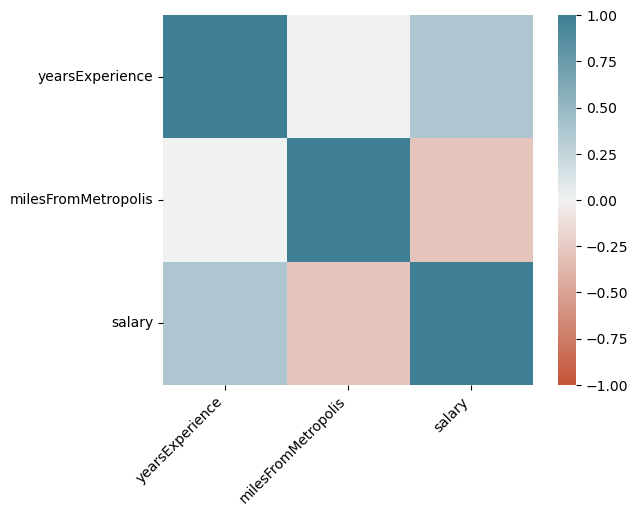

In [24]:
# Correlation metrix using seaborn
ax = sns.heatmap(corr,
                 vmin=-1,
                 vmax=1,
                 center=0,
                 cmap=sns.diverging_palette(20,220,n=200),
                 square=True)


ax.set_xticklabels(ax.get_xticklabels(),
                  rotation=45,
                  horizontalalignment='right'
                  );


## Chi-square Test

In [25]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

conti = pd.crosstab(train_data['jobType'],train_data['degree'])
obs_val = conti.values
res = chi2_contingency(conti)
no_of_rows = len(conti.iloc[0:,0])
no_of_columns = len(conti.iloc[0,0:])
degree_f=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom: ",degree_f)
exp_val = res[3]
chi_sq = sum([(o-e)**2./e for o,e in zip(obs_val,exp_val)])
print(res[0])
print(sum(chi_sq))
print(chi2.ppf(q=1-0.05,df=degree_f))
print(1-chi2.cdf(x=chi_sq[0]+chi_sq[1],df=degree_f))

Degree of Freedom:  28
155995.28114527254
155995.28114527254
41.33713815142739
0.0


In [26]:
# import necessary libraries for chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def perform_chi_square_test(var_1,var_2):
    
    #Contingency Table
    contingency_table = pd.crosstab(train_data[var_1],train_data[var_2])
    
    #Observed Values
    observed_values = contingency_table.values
    
    #Expected Values
    b = chi2_contingency(contingency_table)
    expected_values = b[3]
    
    #Degree of Freedom
    no_of_rows = len(contingency_table.iloc[0:,0])
    no_of_columns = len(contingency_table.iloc[0,0:])
    degree_f=(no_of_rows-1)*(no_of_columns-1)
    print("Degree of Freedom: ",degree_f)
    
    #Significance Level 5%
    alpha = 0.05
    print('Significance level: ',alpha)
    
    #chi-square statistic
    chi_square = sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
    chi_square_statistic = chi_square[0]+chi_square[1]
    print("chi-square statistic: ",chi_square_statistic)
    
    #critical_value
    critical_value=chi2.ppf(q=1-alpha,df=degree_f)
    print('critical_value:',critical_value)
    
    #p-value
    p_value = 1-chi2.cdf(x=chi_square_statistic,df=degree_f)

    print('p-value:',p_value)
          
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

In [27]:
# looping on categorical data list and use function for performing chi-square test on columns from dataset
for x in categorical_list:
    for i in categorical_list:
        if i != x:
            print('chi-square test on: ',x,' ',i,'\n')
            perform_chi_square_test(x,i)
            print('-------------------------------------------------------------------\n')

chi-square test on:  jobType   degree 

Degree of Freedom:  28
Significance level:  0.05
chi-square statistic:  49153.86411257831
critical_value: 41.33713815142739
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  jobType   major 

Degree of Freedom:  56
Significance level:  0.05
chi-square statistic:  16381.915810303108
critical_value: 74.46832415930936
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  jobType   industry 

Degree of Freedom:  42
Significance level:  0.05
chi-square statistic:  100.30610291761408
critical_value: 58.12403768086803
p-value: 1.1246299327360987e-06
Reject H0,There is a relationship between 2 c

From above chi-square test:

- correlated variables:

  1. jobtype and degree
  2. jobtype and major
  3. degree and major


## Scatter Plot

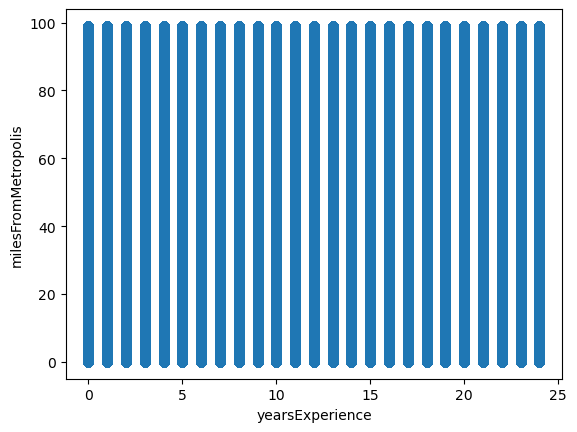

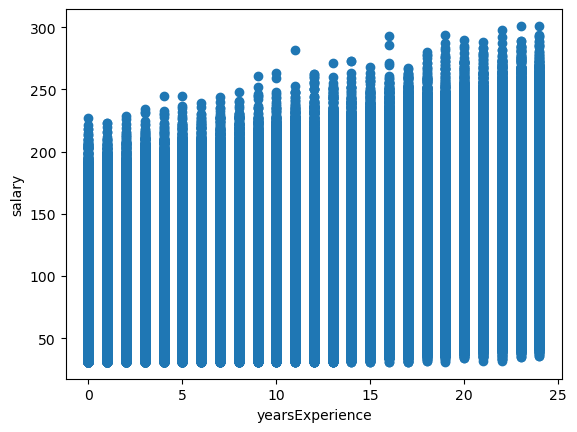

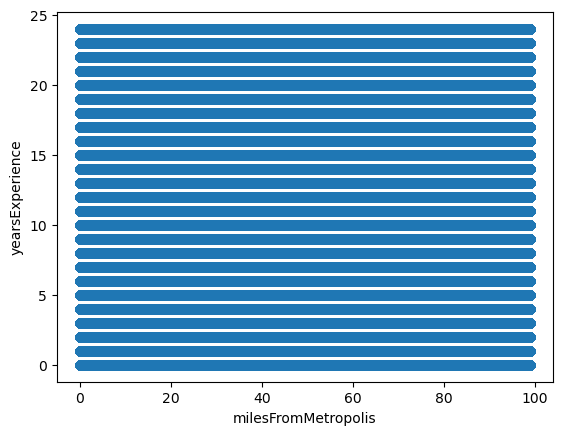

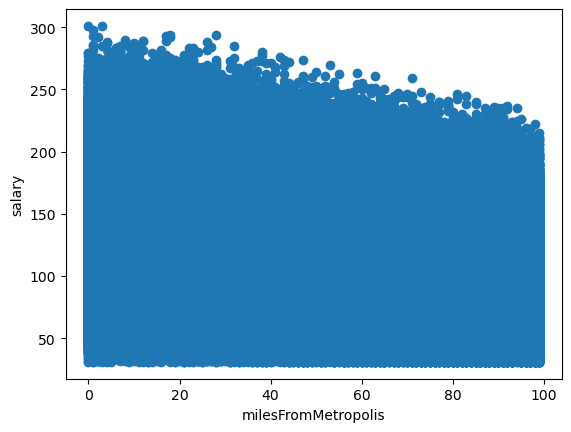

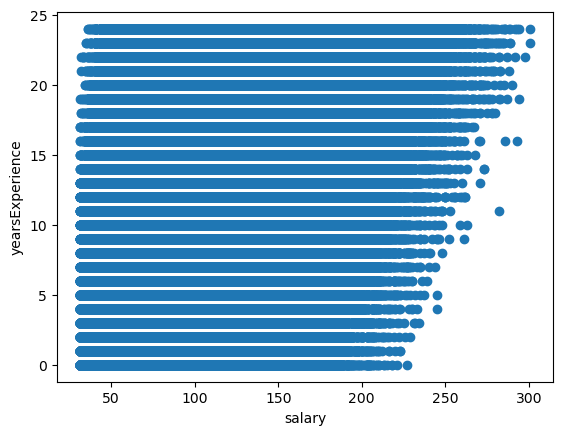

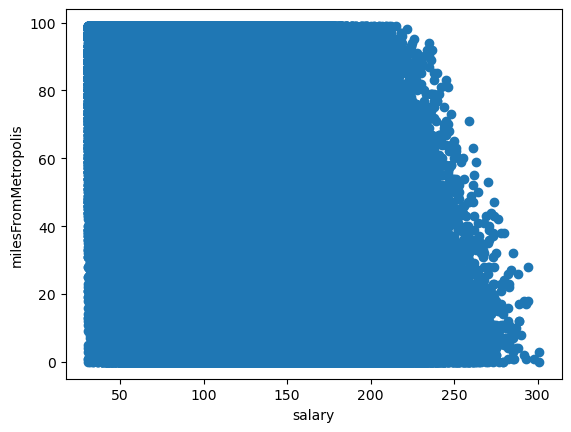

In [28]:
# Scatter plot using matplotlib 
# create function for ploting scatterplot between two columns of dataset
def plot_scatter(x, y):
    plt.figure()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(train_data[x],train_data[y])
    plt.show()    


# Loop through the different columns 
for i in var_list:
    for j in var_list:
        if i != j:
            plot_scatter(i, j)

From above scatter plot

1. Increase in value on yearsExperience axis results in increase of values on salary axis. That is they are positively correlated.

2. Increase in value on 
milesFromMetropolis axis results in decrease of values on salary axis. That is they are negatively correlated.

2. There is no change in values of yearExperience vs milesFromMetropolis graph. That is there is no correlation between these variables.

## Histogram

array([[<AxesSubplot:title={'center':'yearsExperience'}>,
        <AxesSubplot:title={'center':'milesFromMetropolis'}>],
       [<AxesSubplot:title={'center':'salary'}>, <AxesSubplot:>]],
      dtype=object)

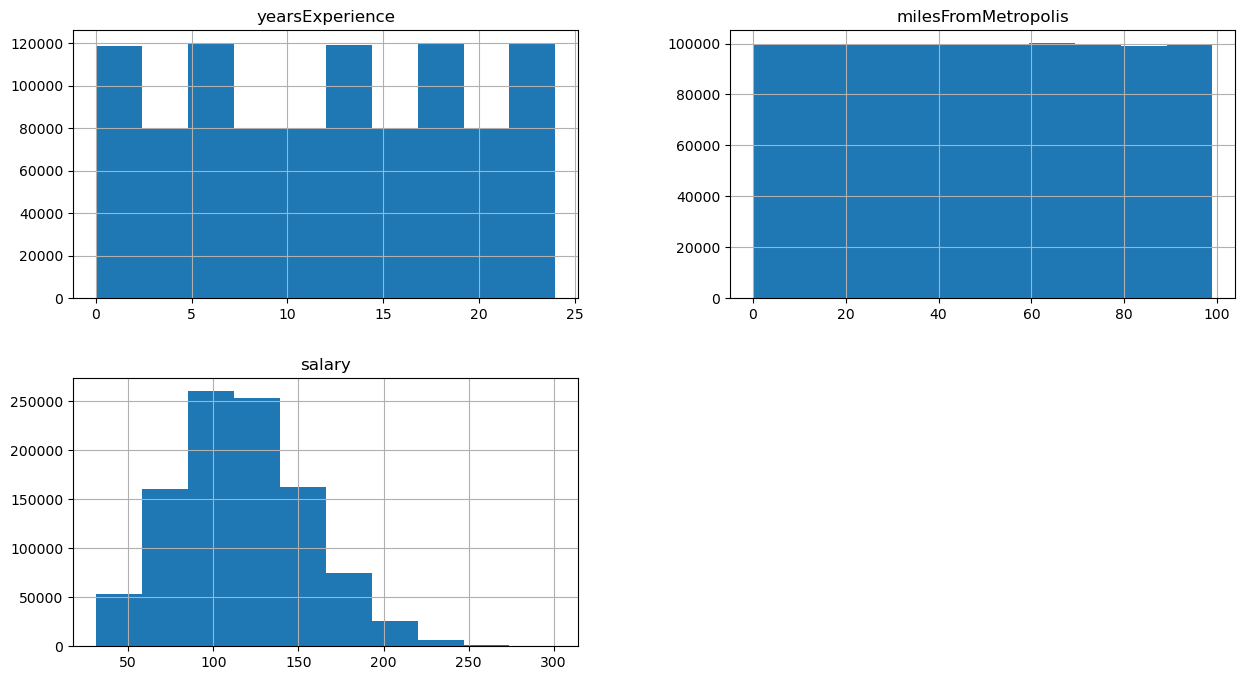

In [29]:
# Histogram using pandas 

train_data.hist(figsize=(15,8))


From the above histogram

1. yearsExperience data distribution is symmetric.

2. milesFromMetropolis data distribution is symmetric.

3. salary data distribution is symmetric, unimodel (it has only one peak in distribution)


## Box Plot

<AxesSubplot:>

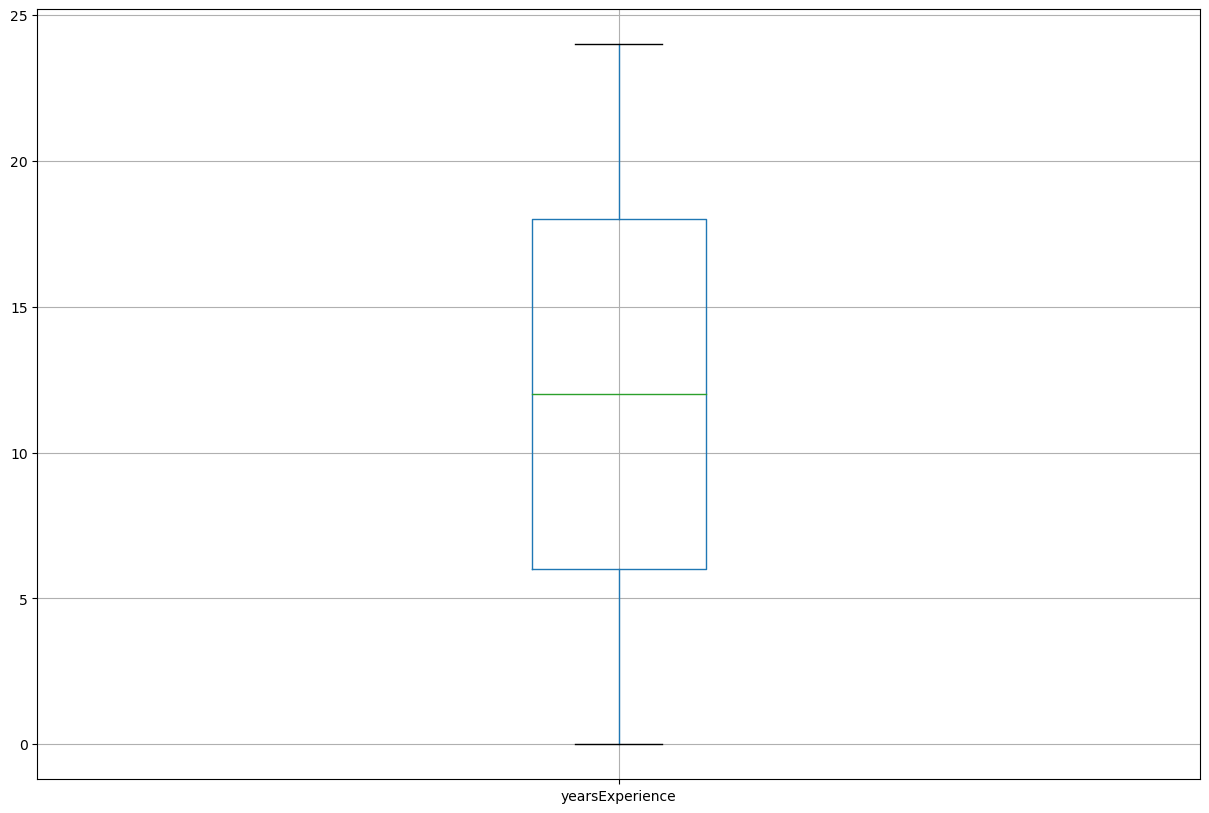

In [30]:
# box plot using pandas 
# box plot for yearsExperience column

train_data.boxplot(column='yearsExperience',figsize=(15,10))




from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has yearExperience of between range 0 to 6.
  2. 25% of employee has yearExperience between range 6 to 12.
  3. 25% of employee has yearExperience between range 12 to 18.
  4. 25% of employee has yearExperience between range 18 to 24

<AxesSubplot:>

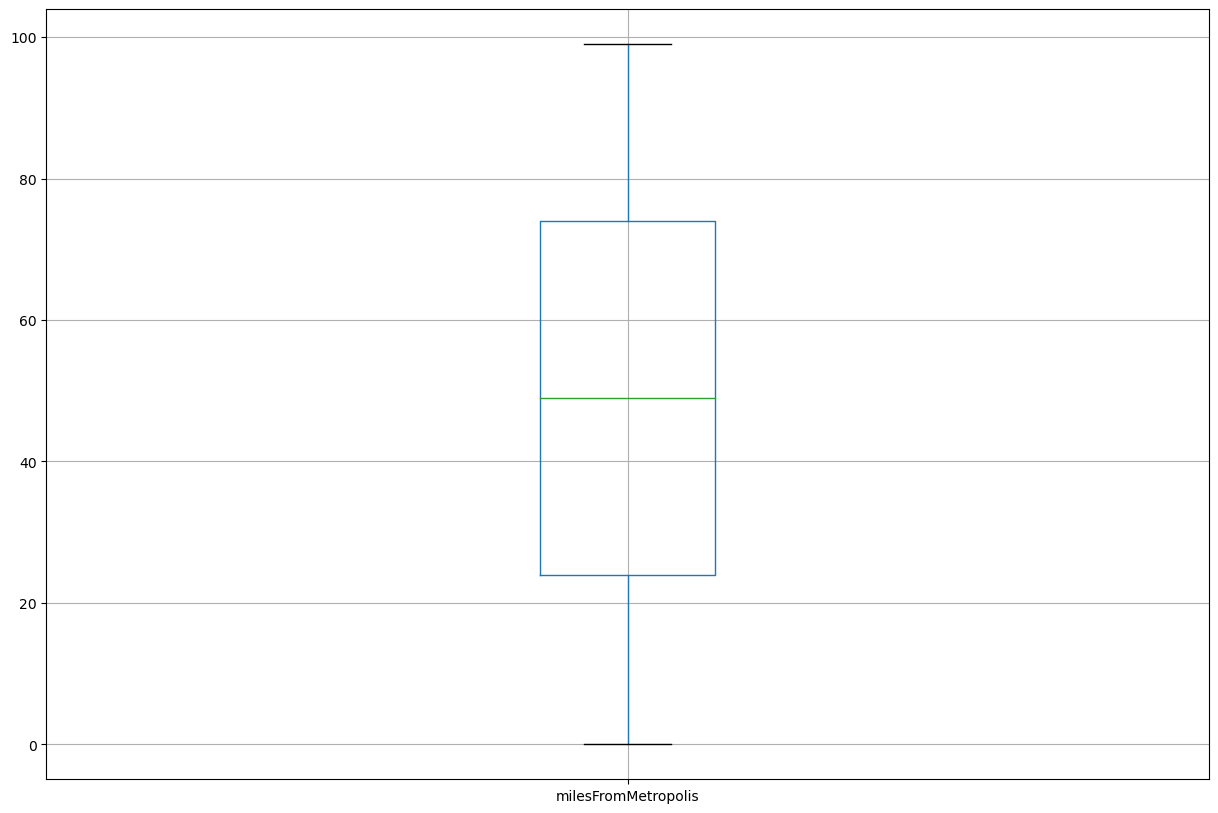

In [31]:
# box plot using pandas 
# box plot for milesFromMetropolies column



train_data.boxplot(column='milesFromMetropolis',figsize=(15,10))




from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of milesFromMetropolis between range 0 to 24.
  2. 25% of employee has value of milesFromMetropolis between range 24 to 52.
  3. 25% of employee has value of milesFromMetropolis between range 52 to 76.
  4. 25% of employee has value of milesFromMetropolis between range 76 to 100

## Violin Plot


<AxesSubplot:>

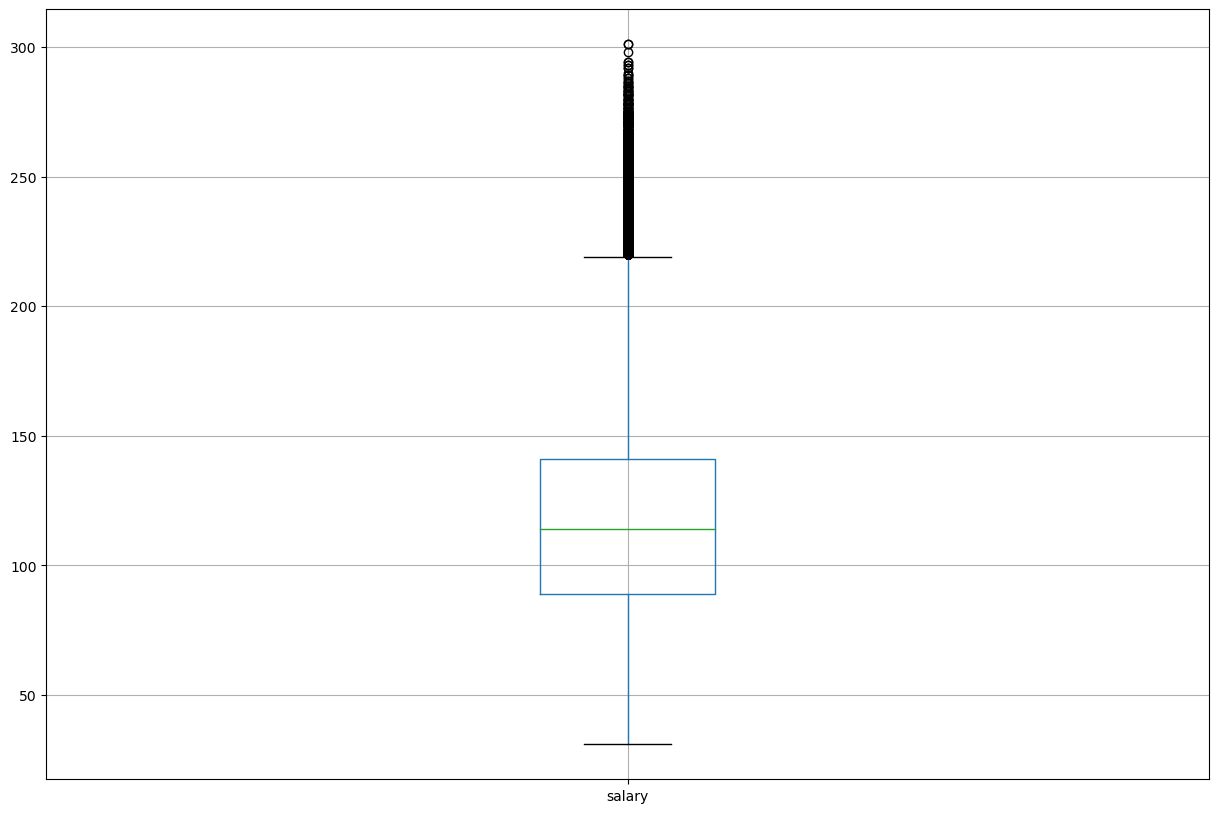

In [32]:
# box plot using pandas 
# box plot for salary column

train_data.boxplot(column='salary',figsize=(15,10))




from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of salary between range 0 to 88.
  2. 25% of employee has value of salary between range 88 to 120.
  3. 25% of employee has value of salary between range 120 to 150.
  4. 25% of employee has value of salary between range 150 to 300


- The mean salary is around 120

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

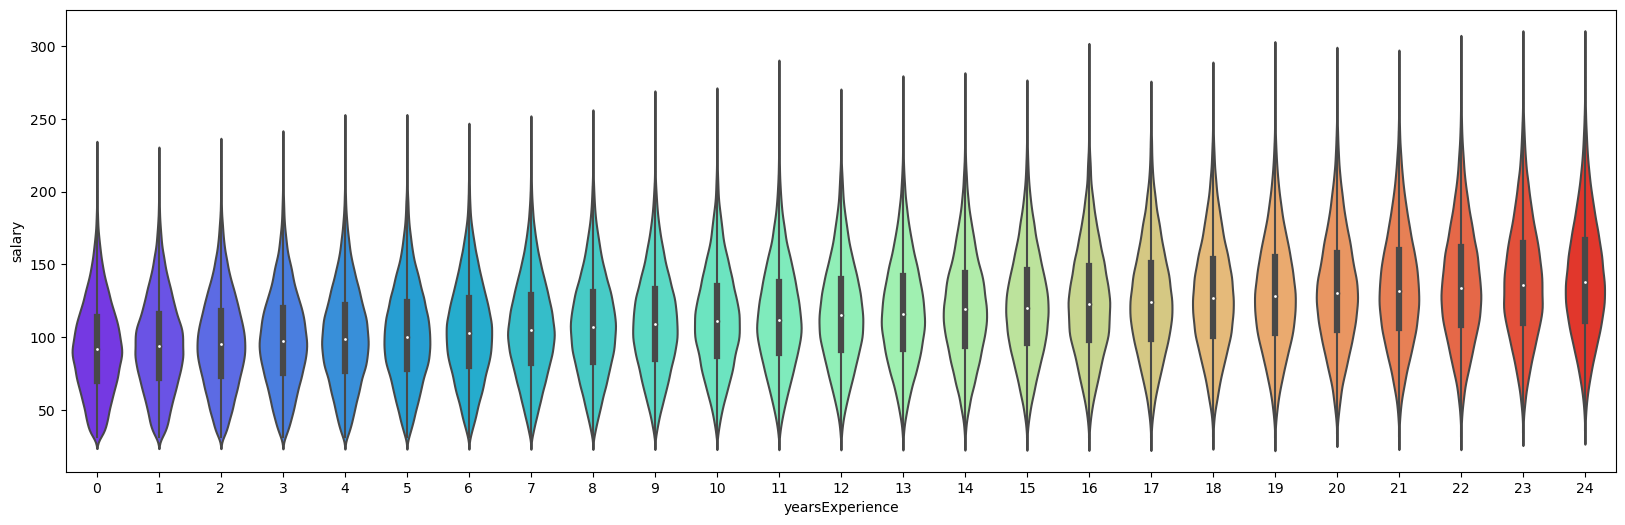

In [33]:
# violin plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))

sns.violinplot(x='yearsExperience',y='salary',data=train_data,palette="rainbow")




from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

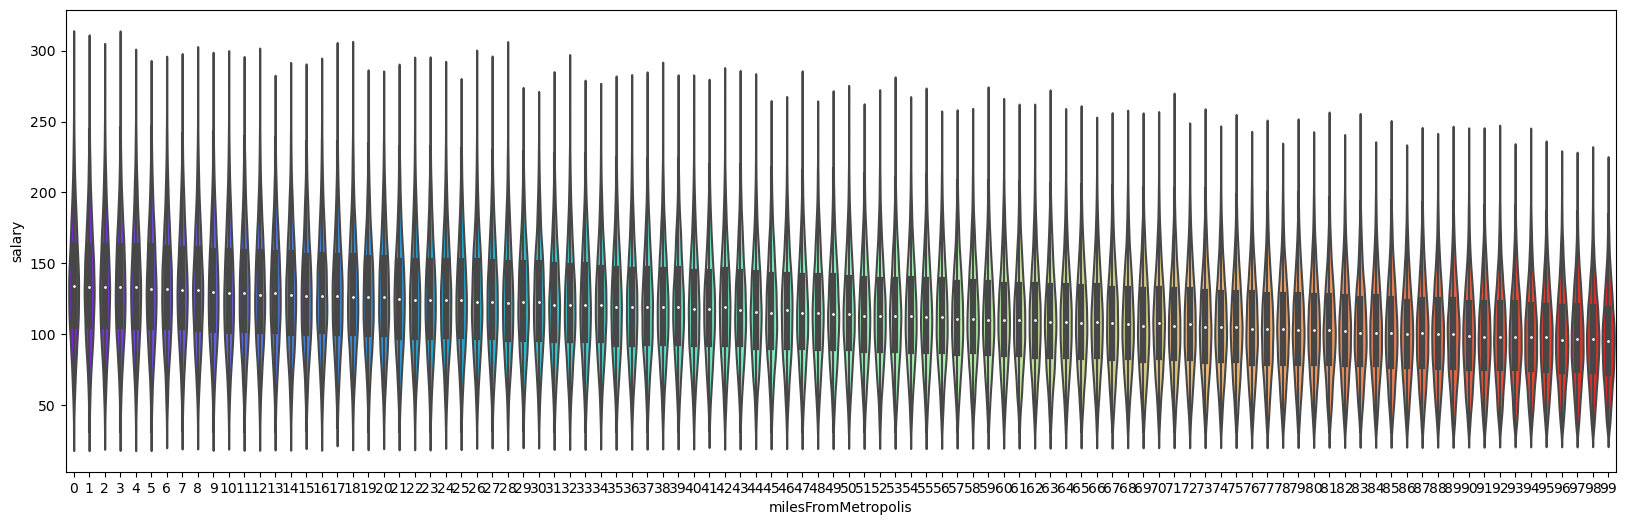

In [34]:
# violin plot for milesFromMetropolis from salary columns
plt.figure(figsize=(20,6))

sns.violinplot(x='milesFromMetropolis',y='salary',data=train_data,palette="rainbow")




from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis


## Boxenplot


<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

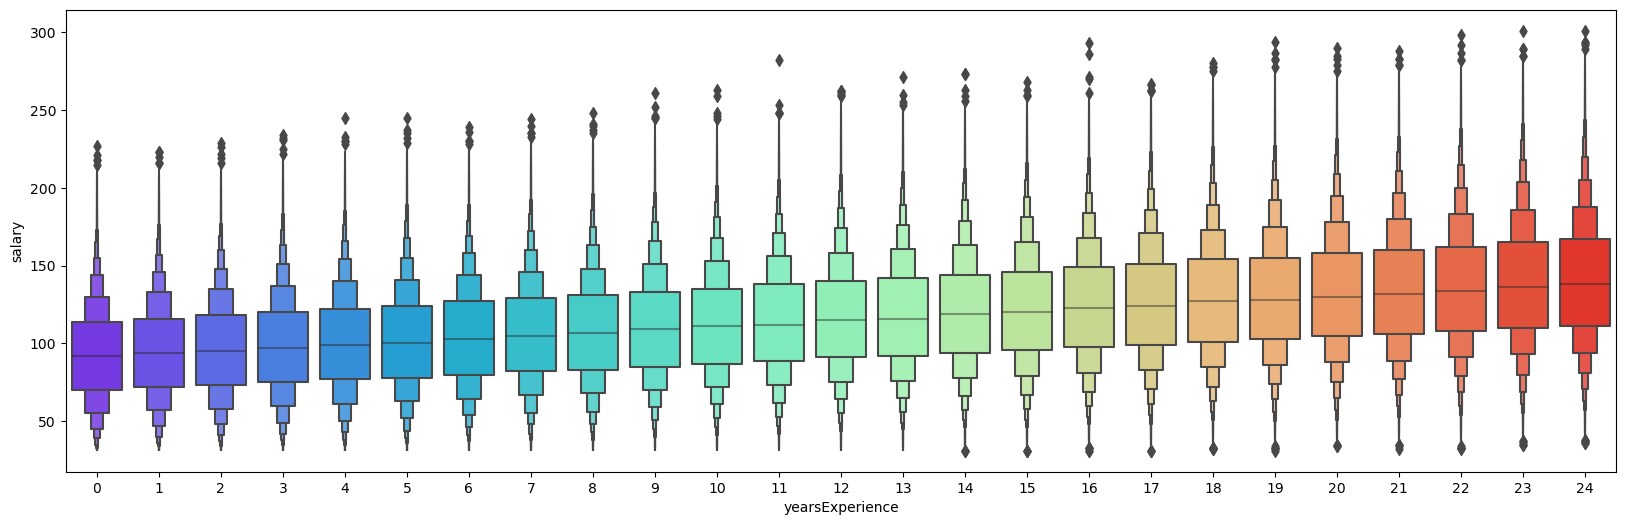

In [35]:
# boxen plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))

sns.boxenplot(x='yearsExperience',y='salary',data=train_data,palette='rainbow')

## Count Plot

<AxesSubplot:xlabel='yearsExperience', ylabel='count'>

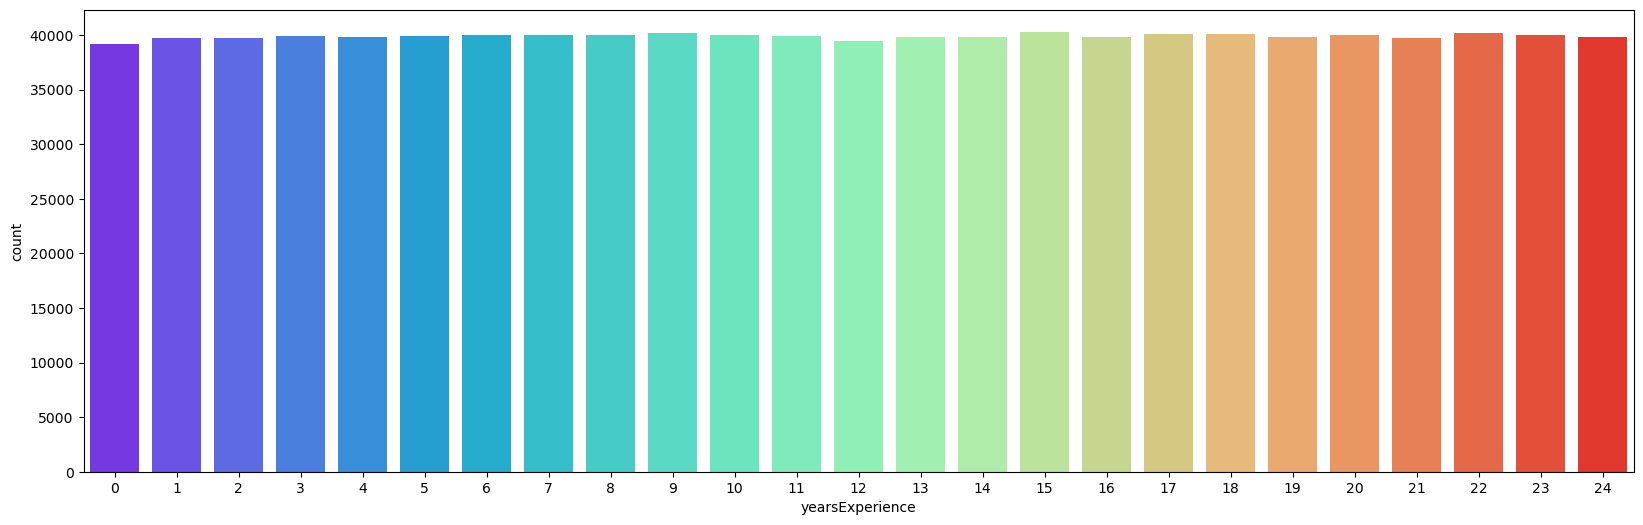

In [36]:
# count plot of whole datset based on yearsExperience
plt.figure(figsize=(20,6))


sns.countplot(x='yearsExperience',data=train_data,palette='rainbow')

From above count plot

distribution of values of yearExperience is equal over complete dataset, symmetrical.

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='count'>

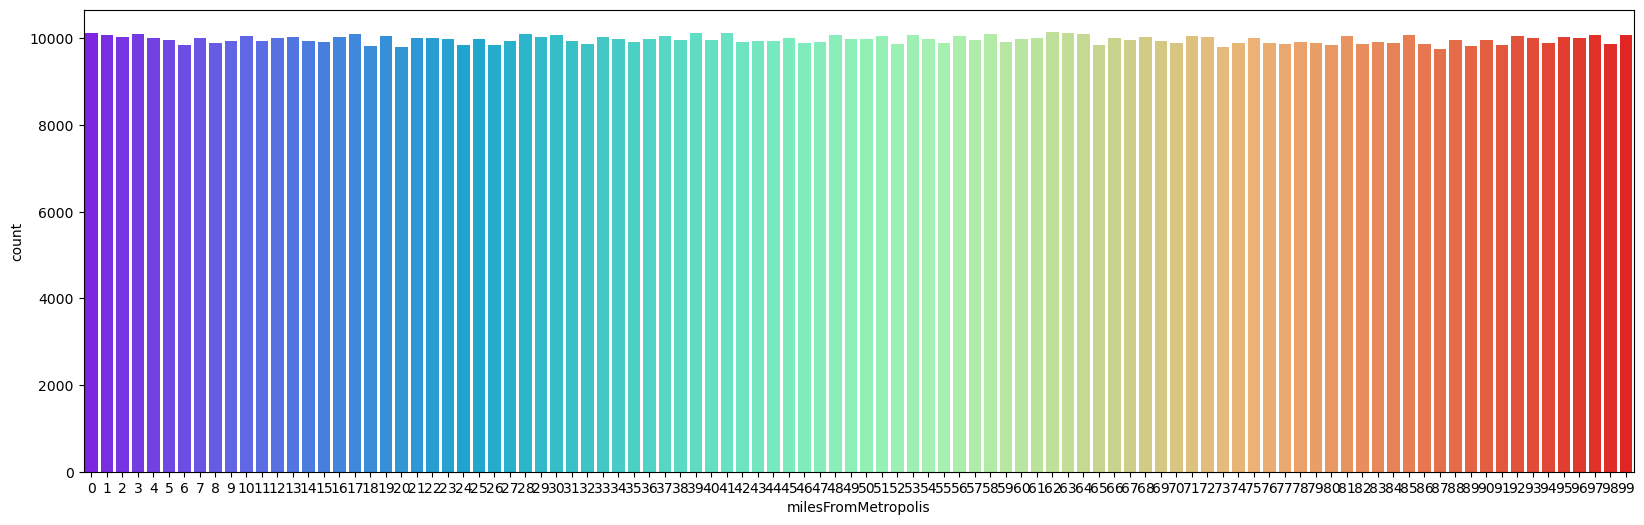

In [37]:
# count plot of whole datset based on milesFromMetropolis
plt.figure(figsize=(20,6))


sns.countplot(x='milesFromMetropolis',data=train_data,palette='rainbow')


From above count plot

distribution of values of milesFromMetropolis is almost equal over complete dataset, symmetrical

## Swarm Plot




plot data on 50000 of 1000000 sample for clear visualization.

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

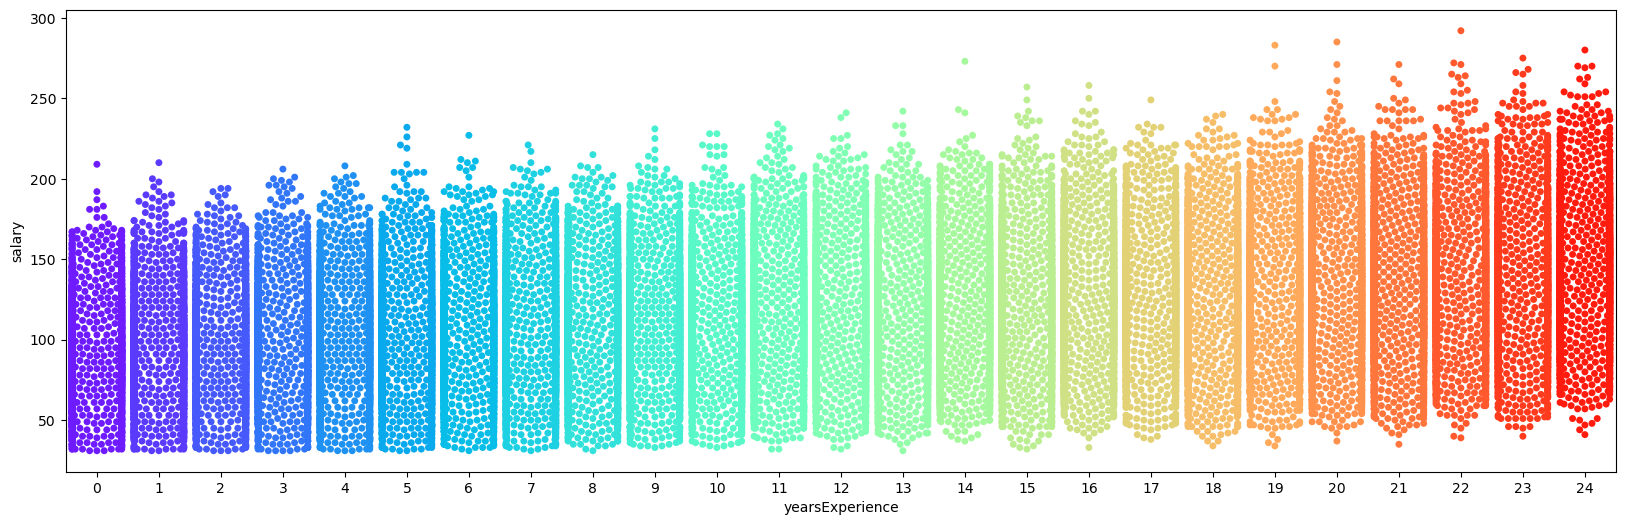

In [38]:
# swarm plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))

sns.swarmplot(x='yearsExperience',y='salary',data=train_data.iloc[1:50000],palette='rainbow')



from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

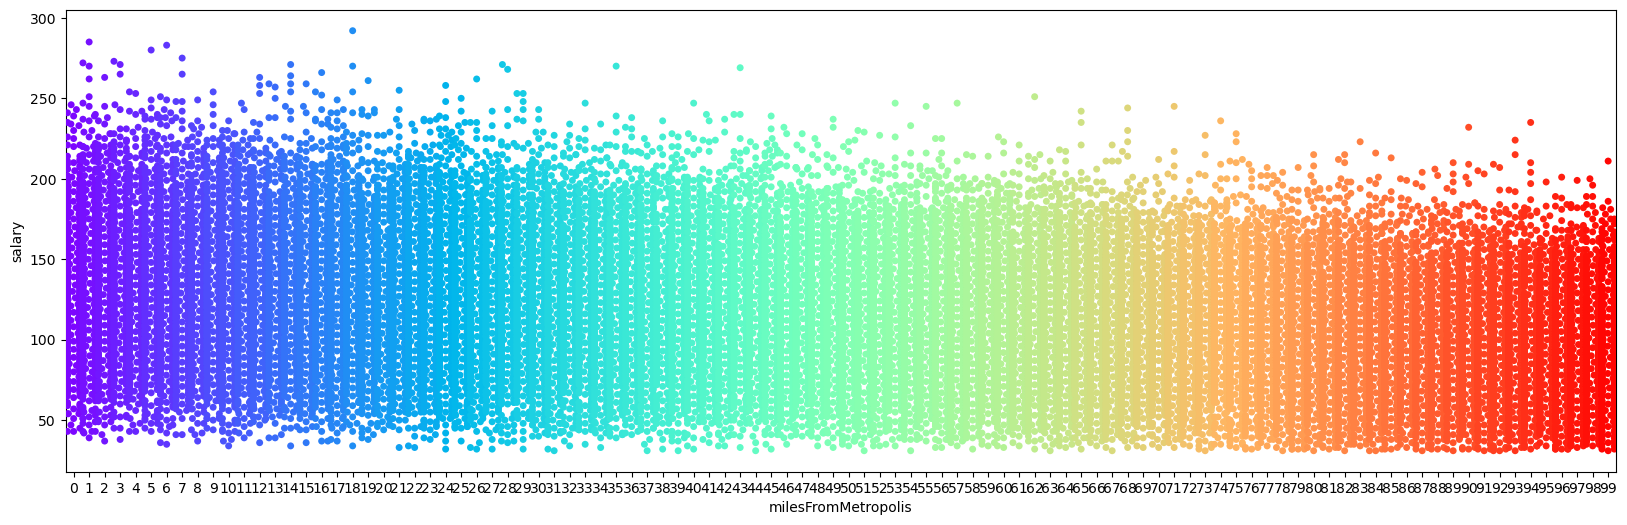

In [39]:
# swarm plot for milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))

sns.swarmplot(x='milesFromMetropolis',y='salary',data=train_data.iloc[1:50000],palette='rainbow')



from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

## Combine plot

Combination of boxenplot and swarm plot

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

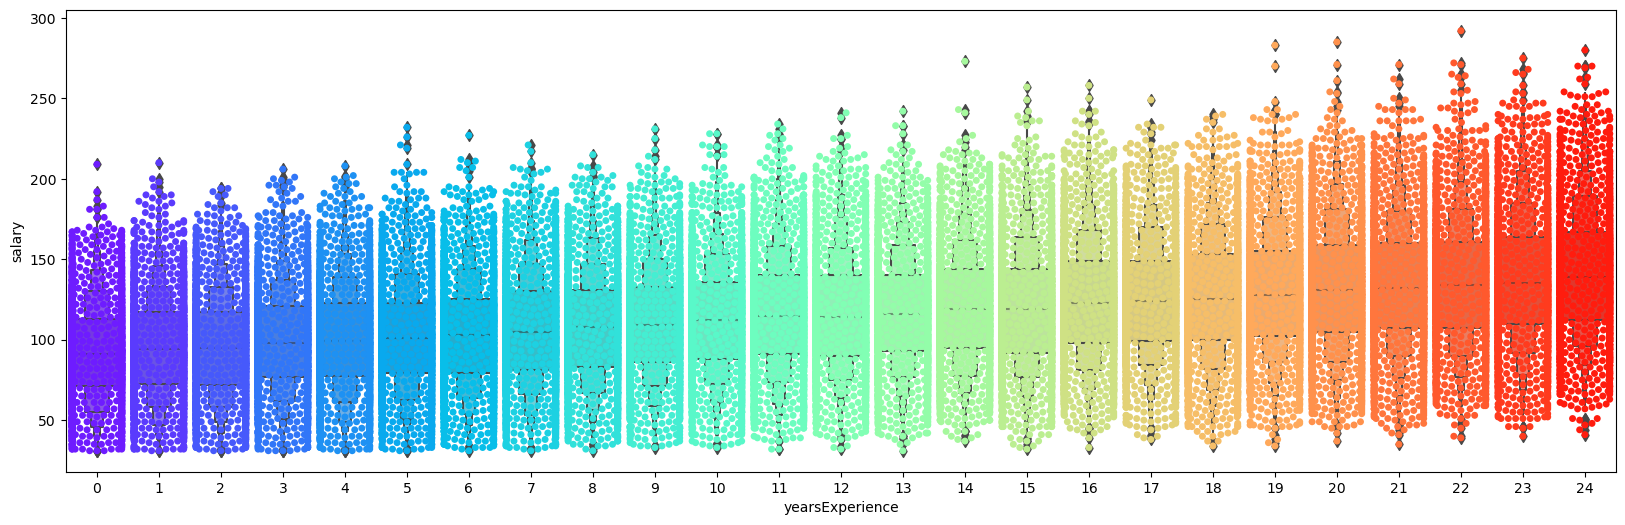

In [40]:
# combine boxen and swarm plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))

sns.boxenplot(x='yearsExperience',y='salary',data=train_data.iloc[1:50000],palette='rainbow')
sns.swarmplot(x='yearsExperience',y='salary',data=train_data.iloc[1:50000],palette='rainbow')


from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

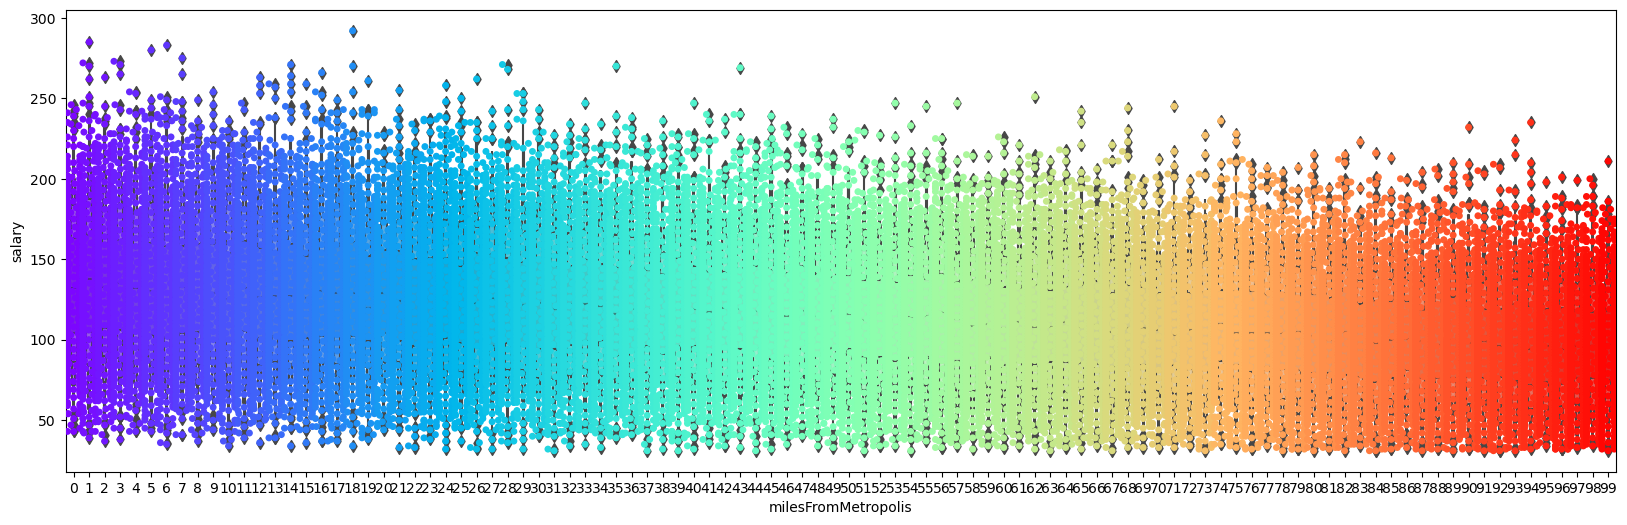

In [41]:
# combine boxen and swarm plot for milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))


sns.boxenplot(x='milesFromMetropolis',y='salary',data=train_data.iloc[1:50000],palette='rainbow')
sns.swarmplot(x='milesFromMetropolis',y='salary',data=train_data.iloc[1:50000],palette='rainbow')




from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

# Strip Plot

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

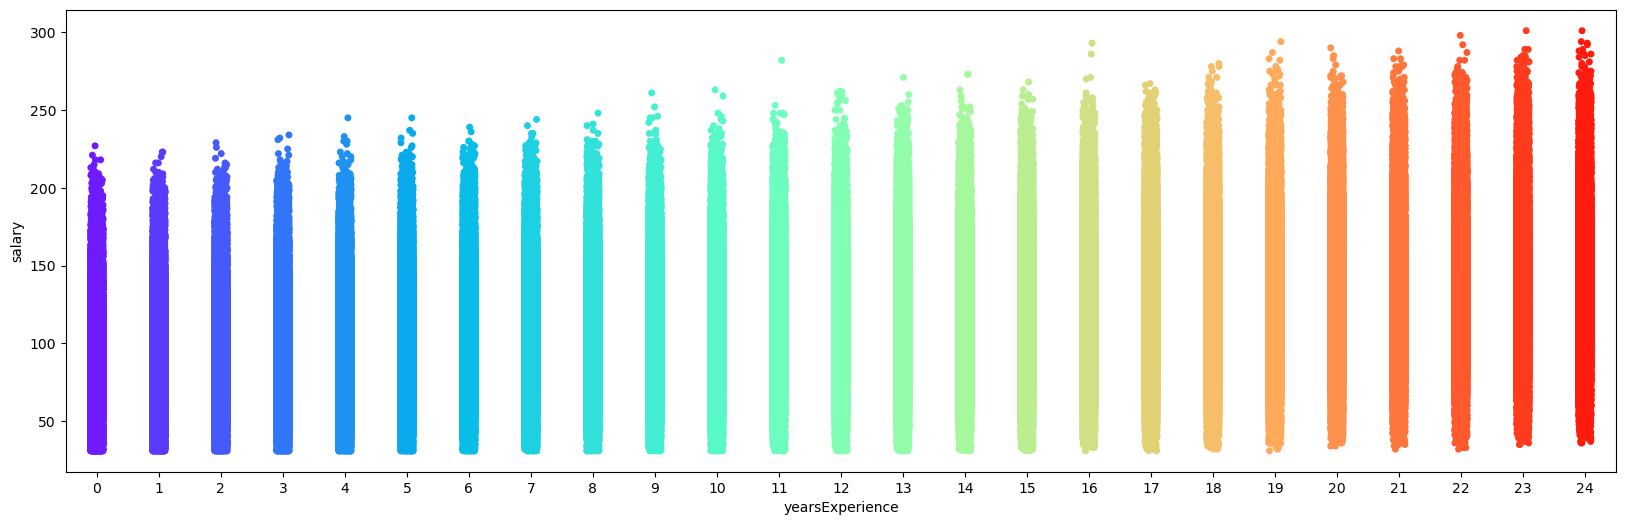

In [42]:
# strip plot between yearsExperience and salary columns
plt.figure(figsize=(20,6))

sns.stripplot(x="yearsExperience",y='salary',data=train_data,palette='rainbow')



from above strip plot:

Distribution of values of Salary increases for increase in values of yearsExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

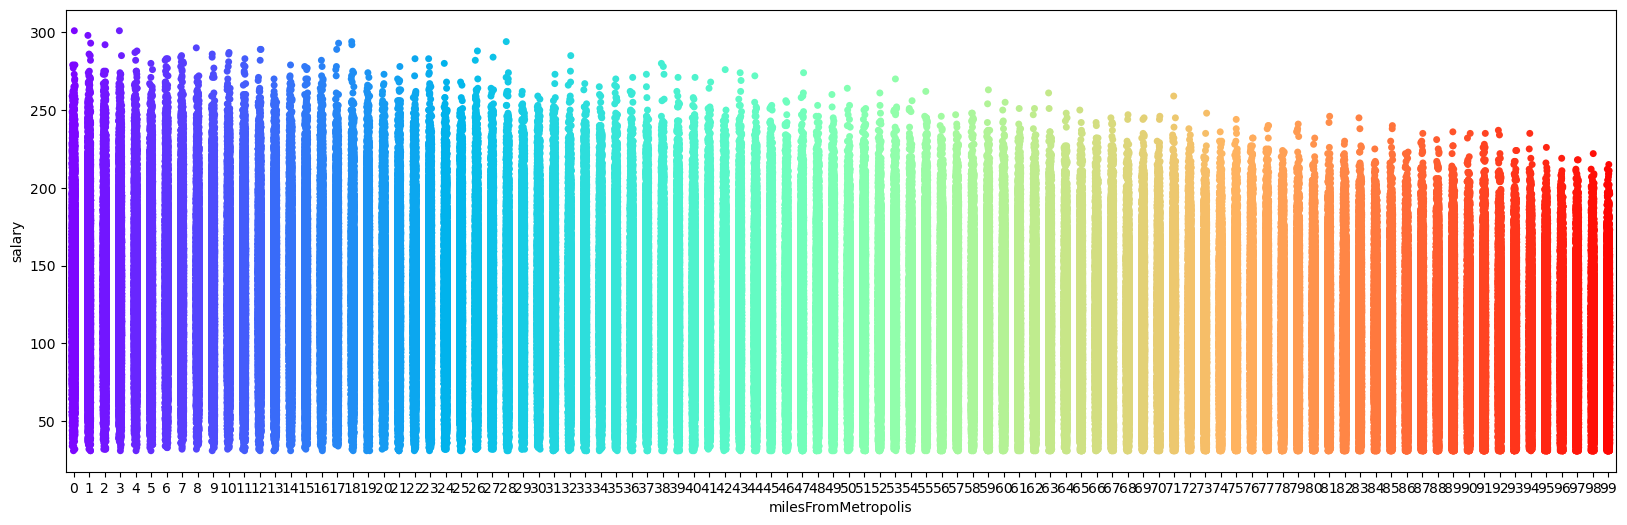

In [43]:
# strip plot between milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))

sns.stripplot(x="milesFromMetropolis",y='salary',data=train_data,palette='rainbow')



from above strip plot:

Distribution of values of Salary decreases for increase in values of milesFromMetropolis

## Variance inflation factor (VIF)

In [44]:
# import statsmodle library for vif 
import statsmodels.api as sm

In [45]:
# creating a dataframe of just numerical values
train_for_vif = train_data.drop(labels=['jobType', 'degree', 'major', 'industry','salary'],axis=1)


# target values
target = train_data['salary']


# numerical values column names
names = ['yearsExperience','milesFromMetropolis']
train_for_vif.dropna(inplace=True)
names

['yearsExperience', 'milesFromMetropolis']

In [46]:
train_for_vif.loc[:,train_for_vif.columns != names[0]]

milesFromMetropolis
0                        83
1                        73
2                        38
3                        17
4                        16
...                     ...
999995                   94
999996                   35
999997                   81
999998                    5
999999                   11

[997548 rows x 1 columns]

In [47]:
# Calculating VIF for each feature.
for i in range(0, len(names)):
  # taking one column as target variable
  y = train_for_vif.loc[:,train_for_vif.columns == names[i]]
  # taking all other remaining columns as fetaure variable
  x = train_for_vif.loc[:,train_for_vif.columns != names[i]]
  # fitting the OLS model on y and x
  model= sm.OLS(y,x)
  results = model.fit()
  # geting the r^2 value of results.
  rsq = results.rsquared
  # calculating vif value
  vif = round(1/(1-rsq),2)
  print("R Square value of {} column is {} keeping all other columns as features".format(names[i],(round(rsq, 2))))
  print("Variance inflation Factor of {} columns is {} \n".format(names[i], vif))

R Square value of yearsExperience column is 0.55 keeping all other columns as features
Variance inflation Factor of yearsExperience columns is 2.22 

R Square value of milesFromMetropolis column is 0.55 keeping all other columns as features
Variance inflation Factor of milesFromMetropolis columns is 2.22 



Observations:

there is colinearity/multicolinearity between 
variables as the VIF value is almost upto 2.5

1. yearsExperience and milesFromMetropolis both have colinearity with all the variables.

## ANOVA Test

### Normality Assumption Check

Before we perform the hypothesis test, we check if the assumptions for the one-way ANOVA hypothesis test are fulfilled. The samples are random and independent samples. Now, we check the normality assumption by plotting a normal probability plot (Q-Q plots) for each grouped variable.

### Homogeneity of variance Assumption Check

### Hypothesis Testing

According to five steps process of hypothesis testing:
H₀: μ₁= μ₂ = μ₃ = … = μ₆
H₁: Not all salary means are equal
α = 0.05
According to F test statistics:

In [87]:
x = 'major'
y = 'salary'
train_anova = train_data[['major','salary']]
groups = train_anova.groupby('major').count().reset_index()
train_anova[train_anova['major']=='BIOLOGY']['salary']
'''
for major in groups['major'].unique():
    stats.probplot(train_anova[train_anova['major']==major]['salary'],dist='norm',plot=plt)
    plt.title('Probability Plot - '+ str(major))
    plt.show()
'''
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit'])    #ss=sum of squares source, ms=mean sum of squares source
anova_table.set_index('Source of Variation', inplace = True)

x_bar = train_anova['salary'].mean()
SSTR = train_anova.groupby('major').count() * (train_anova.groupby('major').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['salary'].sum()

SSE = (train_anova.groupby(x).count() - 1) * train_anova.groupby(x).std()**2
anova_table['SS']['Within Groups'] = SSE[y].sum()

  # calculate SSTR and update anova table
SSTR = SSTR[y].sum() + SSE[y].sum()
anova_table['SS']['Total'] = SSTR

anova_table['df']['Between Groups'] = train_anova[x].nunique() - 1
anova_table['df']['Within Groups'] = train_anova.shape[0] - train_anova[x].nunique()
anova_table['df']['Total'] = train_anova.shape[0] - 1
anova_table['MS'] = anova_table['SS'] / anova_table['df']
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])
alpha = 0.05
  # possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])
anova_table


SS      df               MS             F  \
Source of Variation                                                             
Between Groups        209547309.494914       8  26193413.686864  20572.997068   
Within Groups        1270060536.615651  997539      1273.193867                 
Total                1479607846.110565  997547      1483.246249                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.191831  
Within Groups                          
Total

In [88]:
# perform anova test between two variables.

def perform_anova_test(x,y):
  # two variables of interest
  train_anova = train_data[[x,y]]
  groups = train_anova.groupby(x).count().reset_index()
  # groups.plot(kind='bar',x='major',y='salary')
  print(groups)


  unique_majors = train_anova[x].unique()
  for major in unique_majors:
      stats.probplot(train_anova[train_anova[x] == major][y], dist="norm", plot=plt)
      plt.title("Probability Plot - " +  str(major))
      plt.show()


  # calculate ratio of the largest to the smallest sample standard deviation
  ratio = train_anova.groupby(x).std().max()/train_anova.groupby(x).std().min()
  print(ratio)


  # Create ANOVA backbone table
  data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
  anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit'])    #ss=sum of squares source, ms=mean sum of squares source
  anova_table.set_index('Source of Variation', inplace = True)

  # calculate SSTR and update anova table
  x_bar = train_anova[y].mean()
  SSTR = train_anova.groupby(x).count() * (train_anova.groupby(x).mean() - x_bar)**2
  anova_table['SS']['Between Groups'] = SSTR[y].sum()

  # calculate SSE and update anova table
  SSE = (train_anova.groupby(x).count() - 1) * train_anova.groupby(x).std()**2
  anova_table['SS']['Within Groups'] = SSE[y].sum()

  # calculate SSTR and update anova table
  SSTR = SSTR[y].sum() + SSE[y].sum()
  anova_table['SS']['Total'] = SSTR

  # update degree of freedom
  anova_table['df']['Between Groups'] = train_anova[x].nunique() - 1
  anova_table['df']['Within Groups'] = train_anova.shape[0] - train_anova[x].nunique()
  anova_table['df']['Total'] = train_anova.shape[0] - 1

  # calculate MS
  anova_table['MS'] = anova_table['SS'] / anova_table['df']

  # calculate F 
  F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
  anova_table['F']['Between Groups'] = F

  # p-value
  anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

  # F critical 
  alpha = 0.05
  # possible types "right-tailed, left-tailed, two-tailed"
  tail_hypothesis_type = "two-tailed"
  if tail_hypothesis_type == "two-tailed":
      alpha /= 2
  anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

  # Final ANOVA Table
  print(anova_table)


  # The p-value approach
  print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['P-value']['Between Groups'] <= alpha:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
  print(conclusion)
      
  # The critical value approach
  print("\n--------------------------------------------------------------------------------------")
  print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
  print(conclusion)

         major  salary
0      BIOLOGY   58379
1     BUSINESS   58518
2    CHEMISTRY   58875
3      COMPSCI   58382
4  ENGINEERING   58594
5   LITERATURE   58684
6         MATH   57800
7         NONE  529906
8      PHYSICS   58410


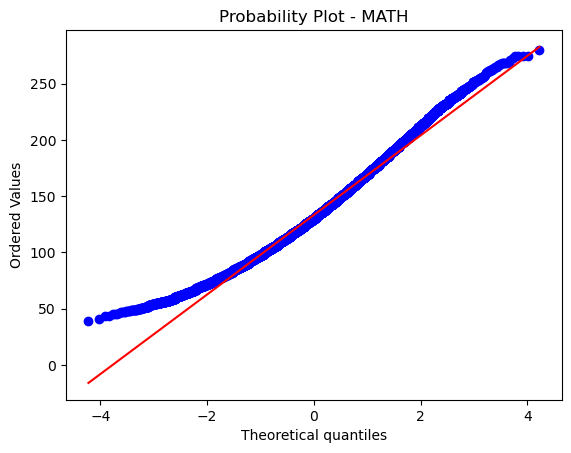

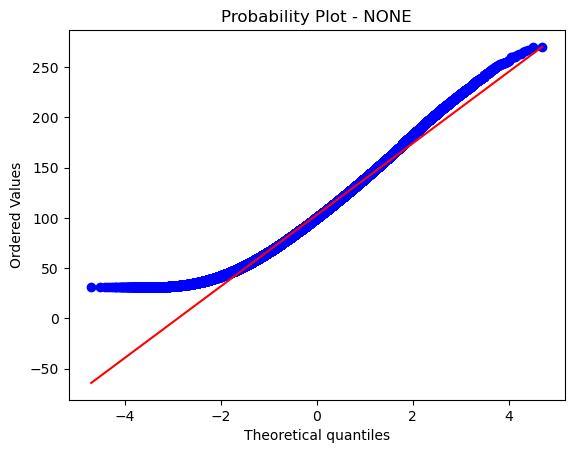

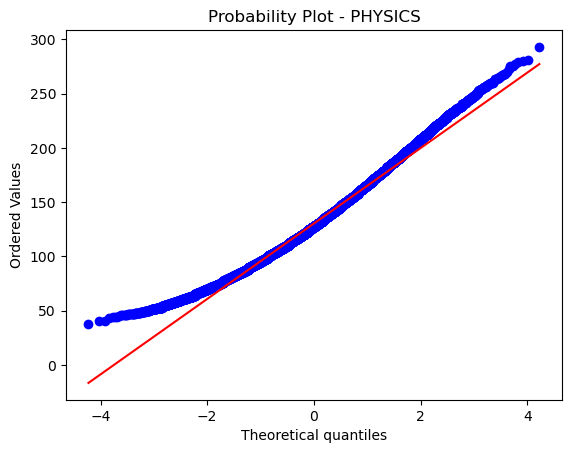

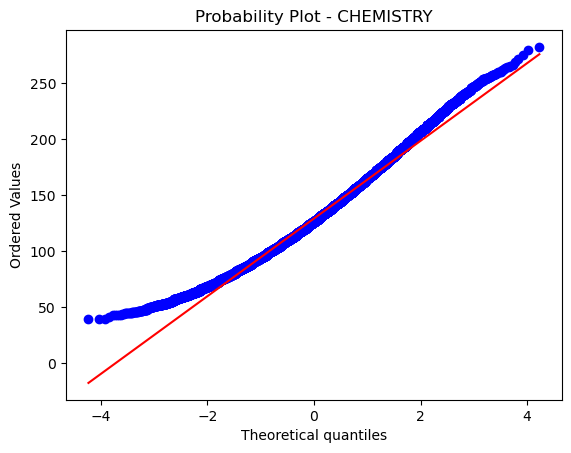

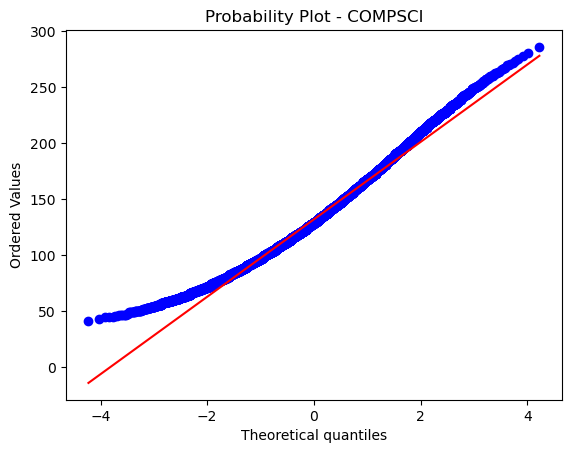

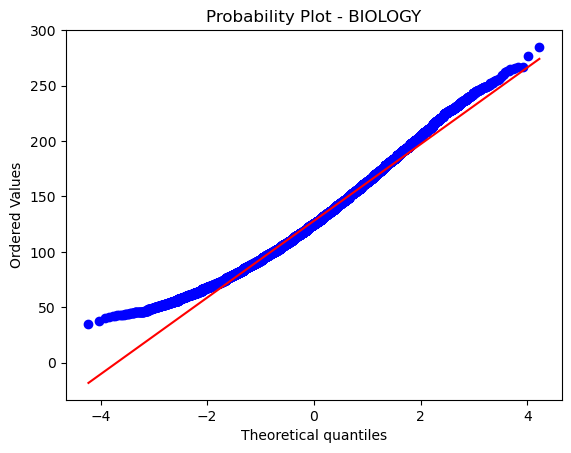

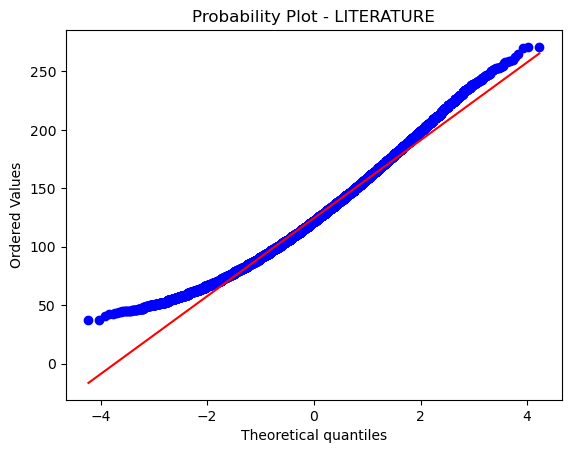

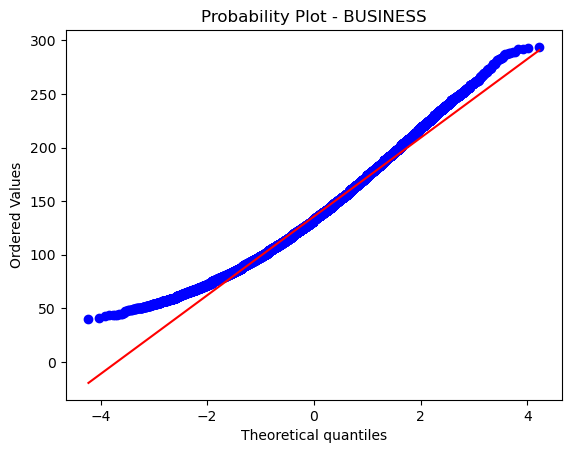

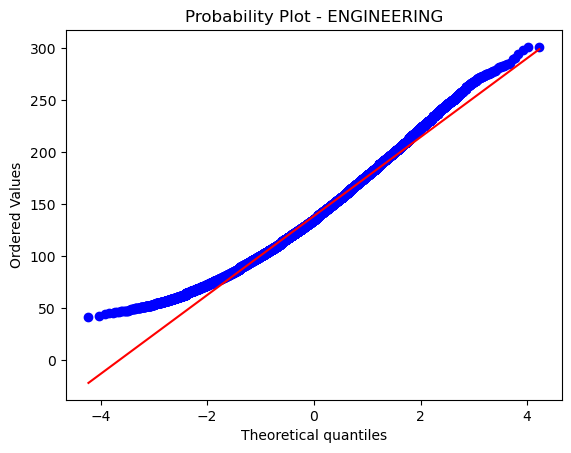

salary    1.137076
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        209547309.494914       8  26193413.686864  20572.997068   
Within Groups        1270060536.615651  997539      1273.193867                 
Total                1479607846.110565  997547      1483.246249                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.191831  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 20572.997067846136  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 2

In [89]:
# perform anova test on major and salary
perform_anova_test('major','salary')


          jobType  salary
0             CEO  124778
1             CFO  124369
2             CTO  125045
3         JANITOR  122562
4          JUNIOR  124554
5         MANAGER  125120
6          SENIOR  125886
7  VICE_PRESIDENT  125234


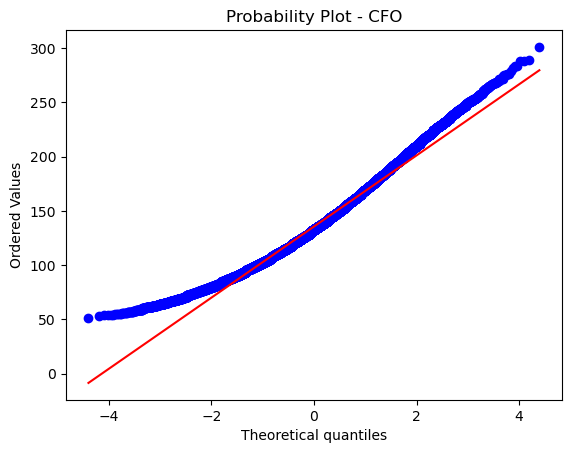

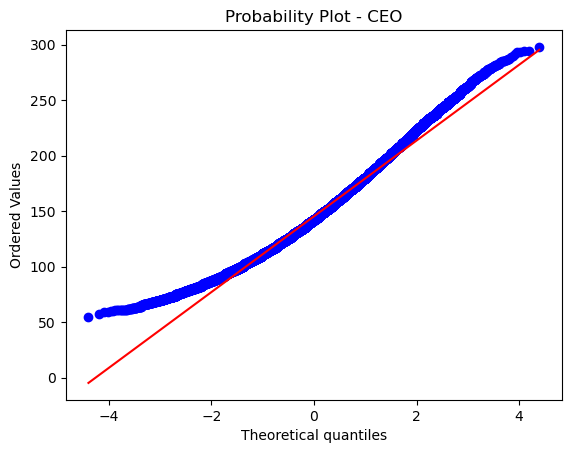

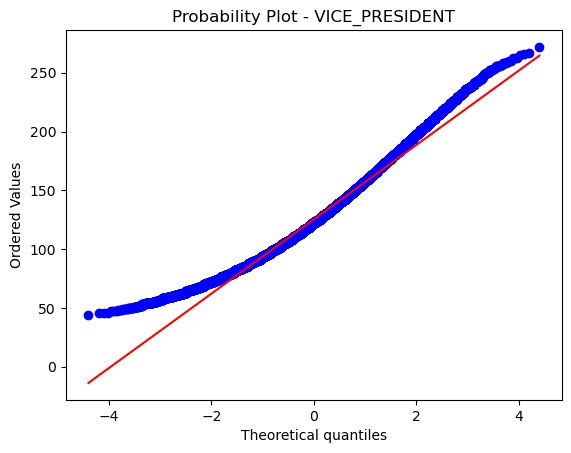

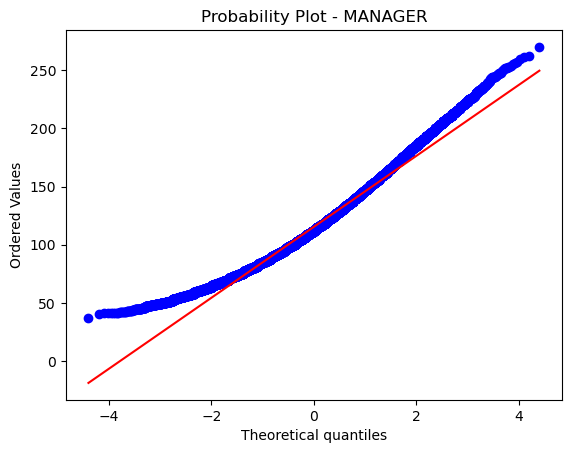

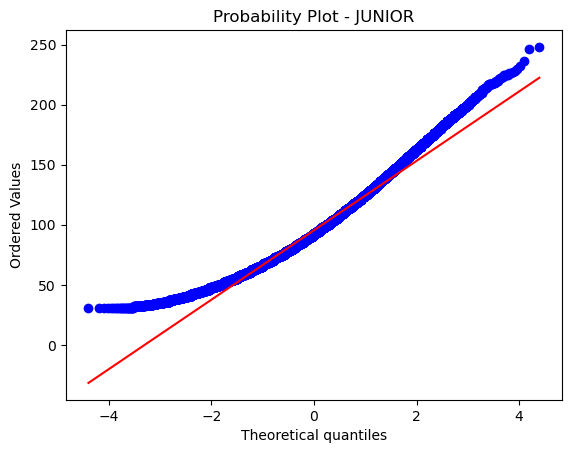

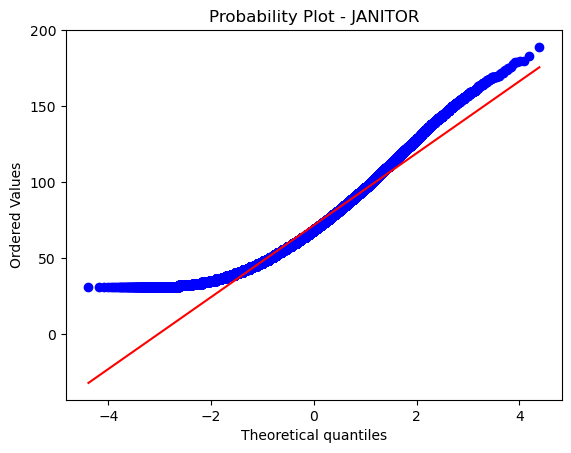

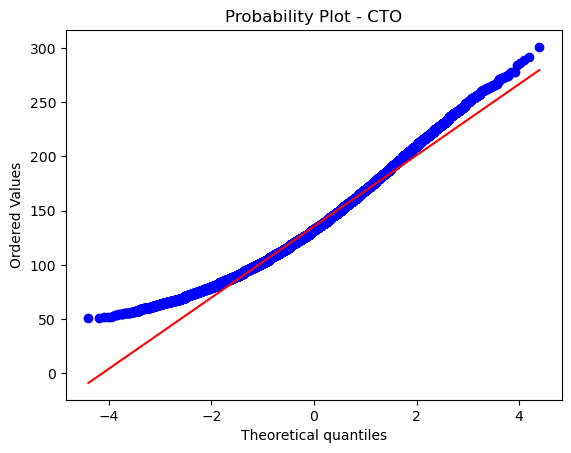

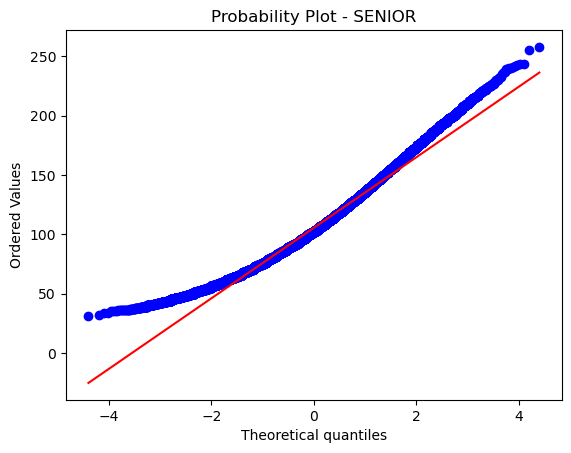

salary    1.428316
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        520557906.406689       7  74365415.200956  77349.961883   
Within Groups         959049939.703873  997540       961.415021                 
Total                1479607846.110561  997547      1483.246249                 

                    P-value   F crit  
Source of Variation                   
Between Groups          0.0  2.28755  
Within Groups                         
Total                                 
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 77349.96188255494  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 77349.9

In [90]:
# perform anova test on jobType and salary
perform_anova_test('jobType','salary')




        degree  salary
0    BACHELORS  175495
1     DOCTORAL  175362
2  HIGH_SCHOOL  235769
3      MASTERS  175310
4         NONE  235612


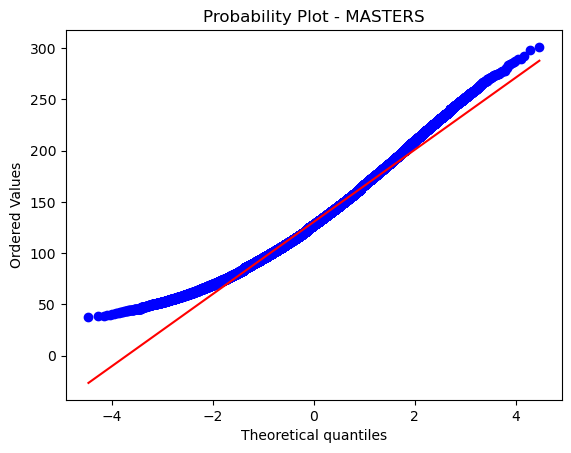

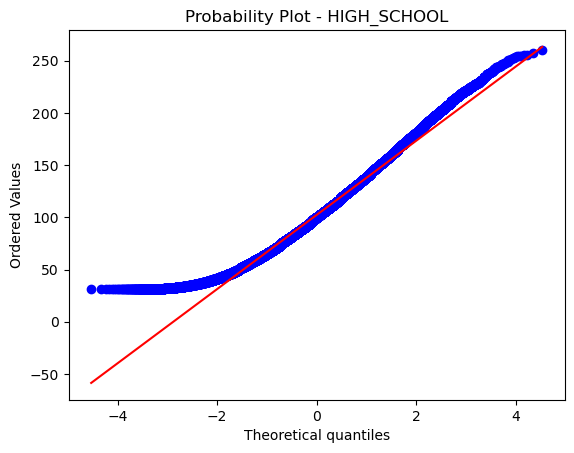

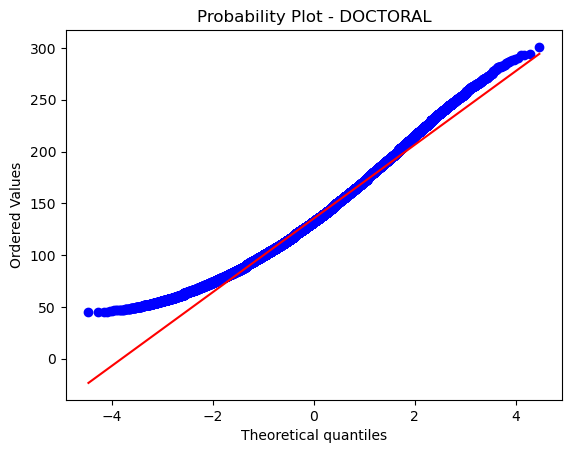

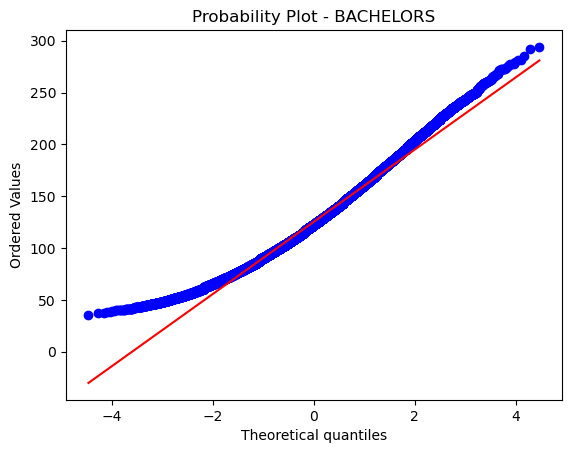

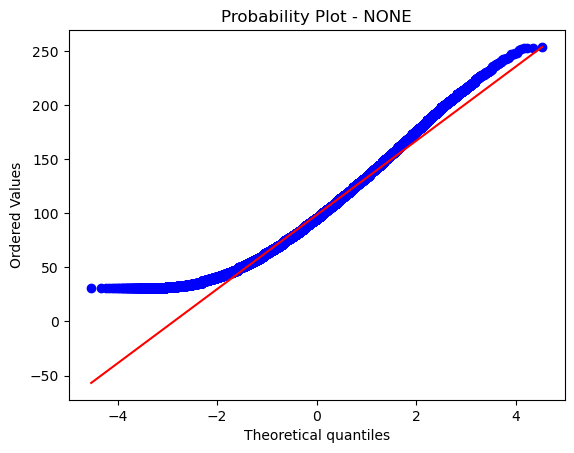

salary    1.034168
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        235082352.781875       4  58770588.195469  47107.262306   
Within Groups        1244525493.328681  997543      1247.590824                 
Total                1479607846.110556  997547      1483.246249                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.785834  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 47107.26230562572  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 47

In [91]:
# perform anova test on degree and salary

perform_anova_test('degree','salary')



    industry  salary
0       AUTO  142766
1  EDUCATION  141149
2    FINANCE  142866
3     HEALTH  142736
4        OIL  142770
5    SERVICE  142056
6        WEB  143205


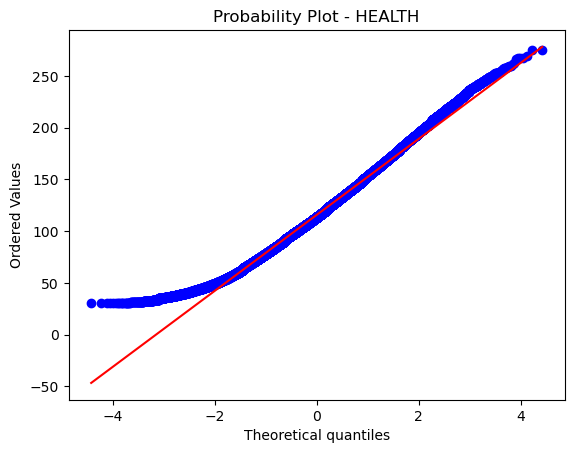

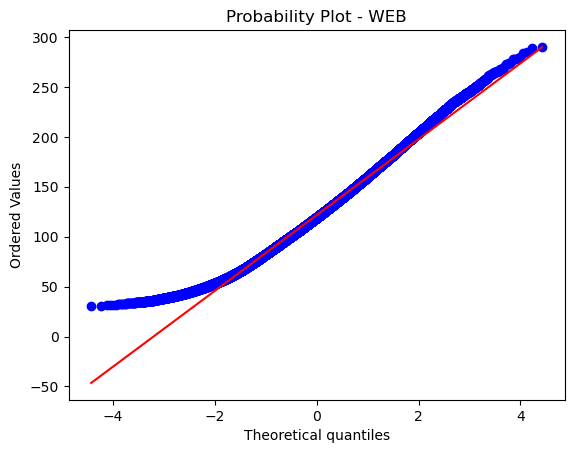

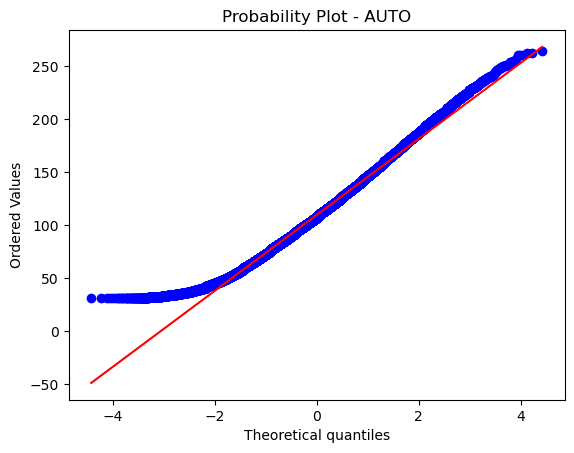

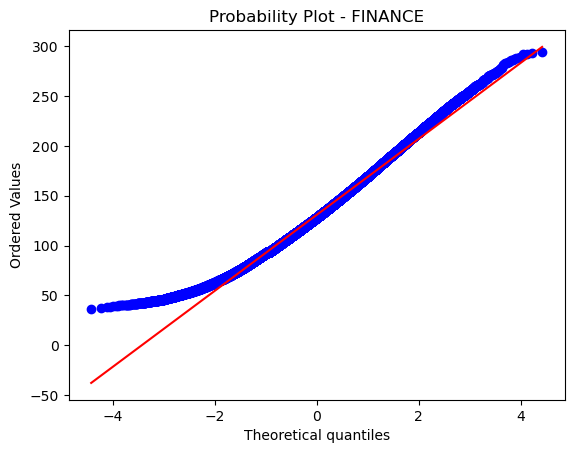

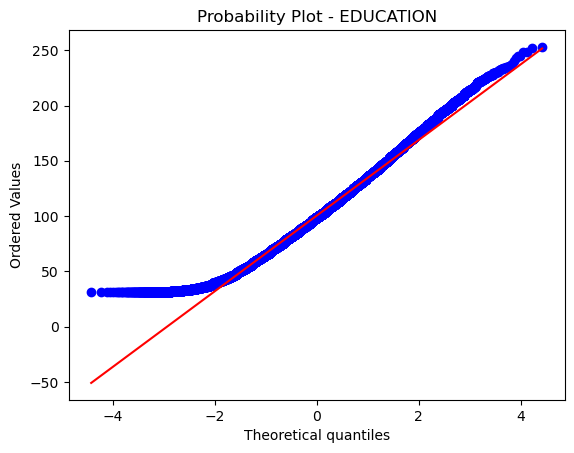

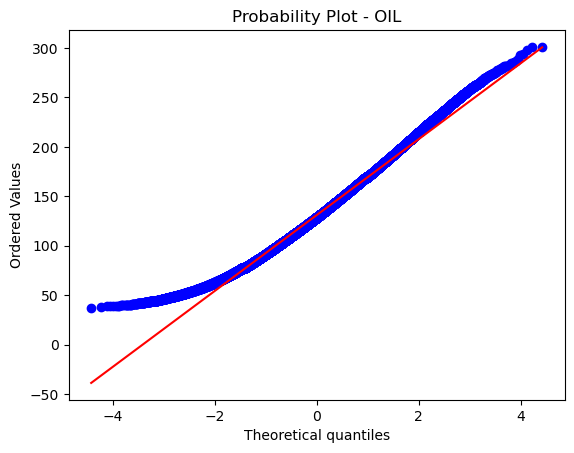

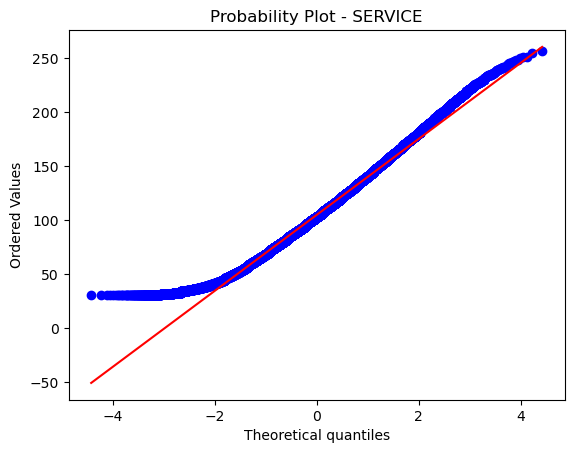

salary    1.119722
dtype: float64
                                    SS      df             MS             F  \
Source of Variation                                                           
Between Groups        126158683.032602       6  21026447.1721  15497.252287   
Within Groups         1353449163.07796  997541    1356.785499                 
Total                1479607846.110562  997547    1483.246249                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.408242  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 15497.25228748466  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 15497.252287

In [92]:
# perform anova test on industry and salary

perform_anova_test('industry','salary')



          jobType  yearsExperience
0             CEO           124778
1             CFO           124369
2             CTO           125045
3         JANITOR           122562
4          JUNIOR           124554
5         MANAGER           125120
6          SENIOR           125886
7  VICE_PRESIDENT           125234


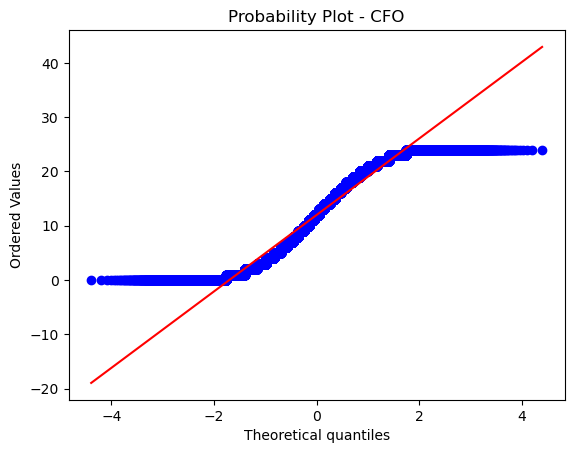

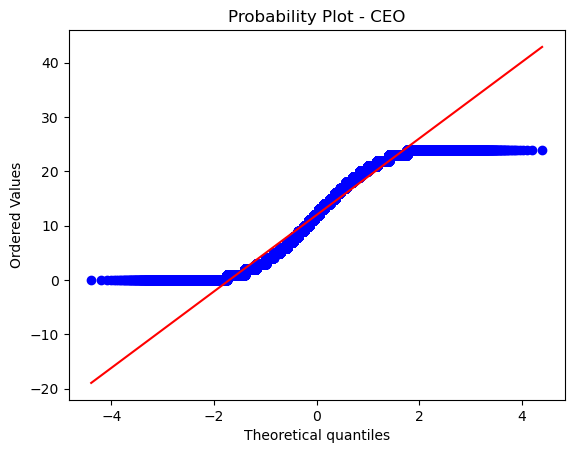

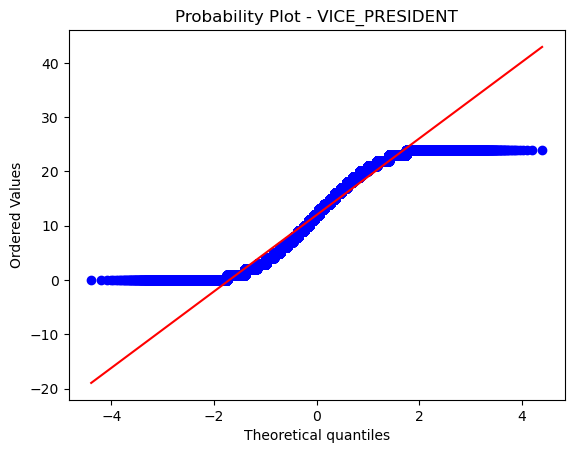

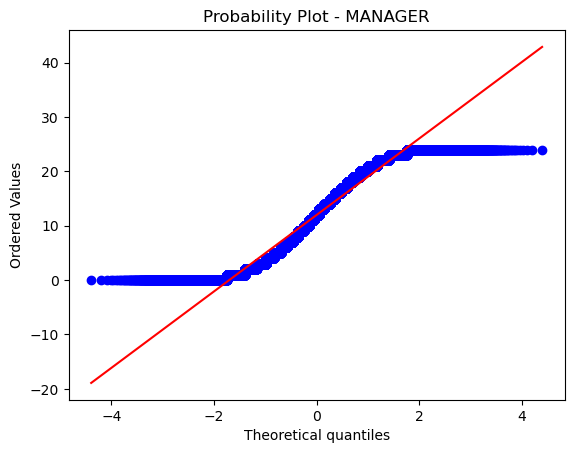

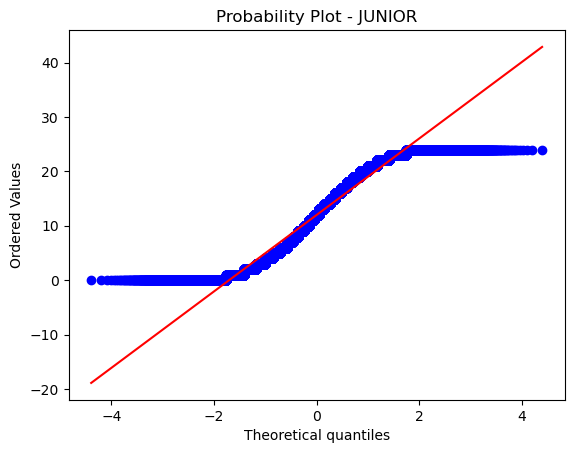

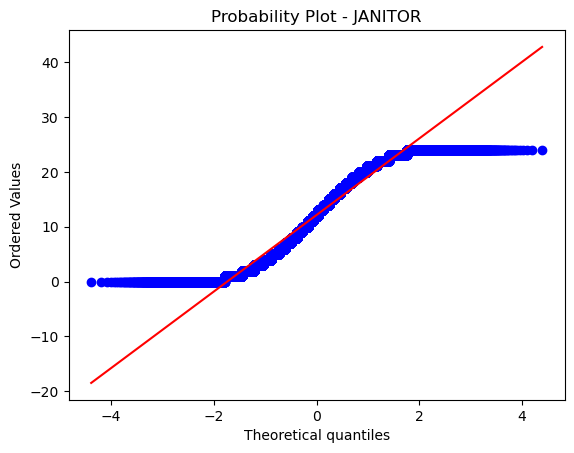

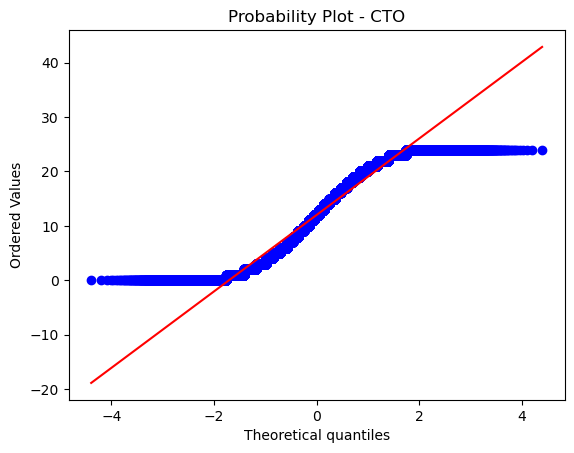

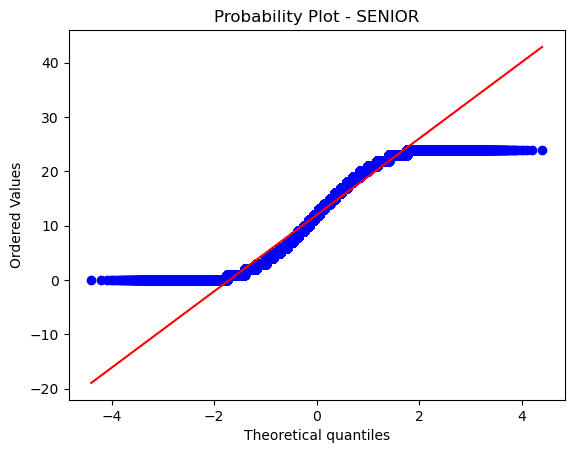

yearsExperience    1.010054
dtype: float64
                                  SS      df          MS         F P-value  \
Source of Variation                                                          
Between Groups           2638.827764       7  376.975395  7.262148     0.0   
Within Groups        51781931.264722  997540   51.909629                     
Total                51784570.092486  997547    51.91191                     

                      F crit  
Source of Variation           
Between Groups       2.28755  
Within Groups                 
Total                         
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 7.262147745370608  and p value is: 9.905482767358365e-09
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 7.262147745370608  and critical value is: 2.2875503809

In [93]:
# perform anova test on jobType and yearsExperience

perform_anova_test('jobType','yearsExperience')



        degree  yearsExperience
0    BACHELORS           175495
1     DOCTORAL           175362
2  HIGH_SCHOOL           235769
3      MASTERS           175310
4         NONE           235612


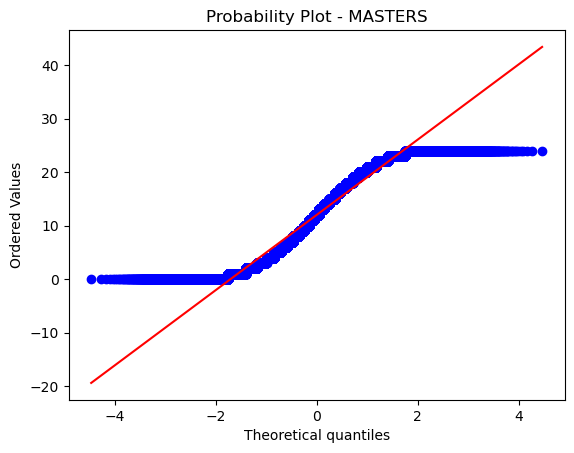

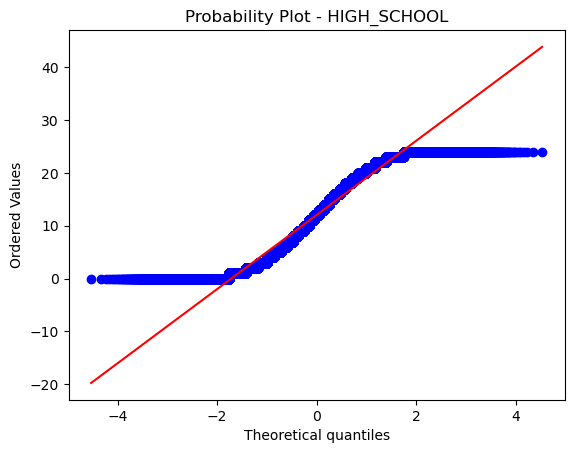

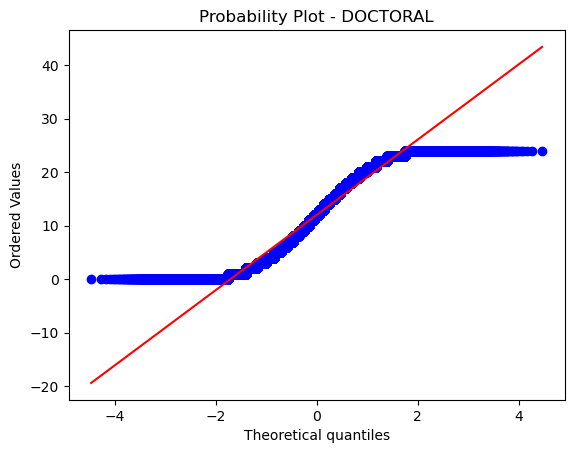

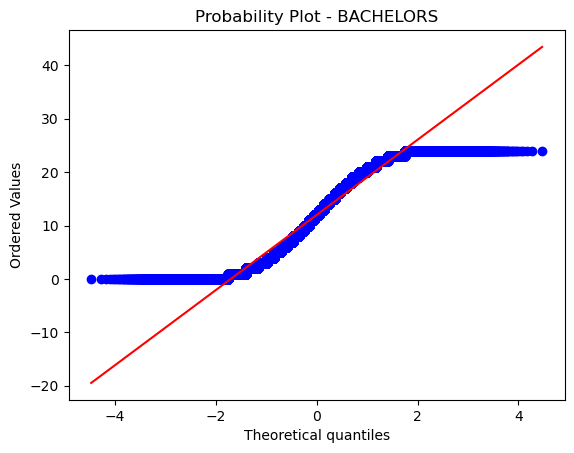

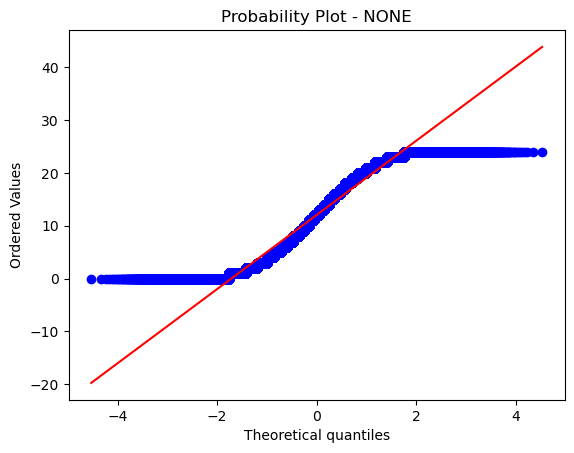

yearsExperience    1.003202
dtype: float64
                                  SS      df          MS         F  P-value  \
Source of Variation                                                           
Between Groups            667.587348       4  166.896837  3.215029  0.01198   
Within Groups        51783902.505138  997543   51.911449                      
Total                51784570.092486  997547    51.91191                      

                       F crit  
Source of Variation            
Between Groups       2.785834  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 3.2150294466062923  and p value is: 0.011980261991255126
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 3.2150294466062923  and critical value is: 2

In [94]:
# perform anova test on degree and yearsExperience

perform_anova_test('degree','yearsExperience')



         major  yearsExperience
0      BIOLOGY            58379
1     BUSINESS            58518
2    CHEMISTRY            58875
3      COMPSCI            58382
4  ENGINEERING            58594
5   LITERATURE            58684
6         MATH            57800
7         NONE           529906
8      PHYSICS            58410


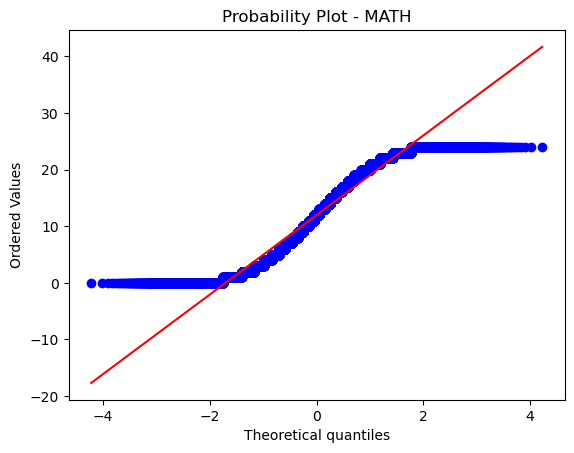

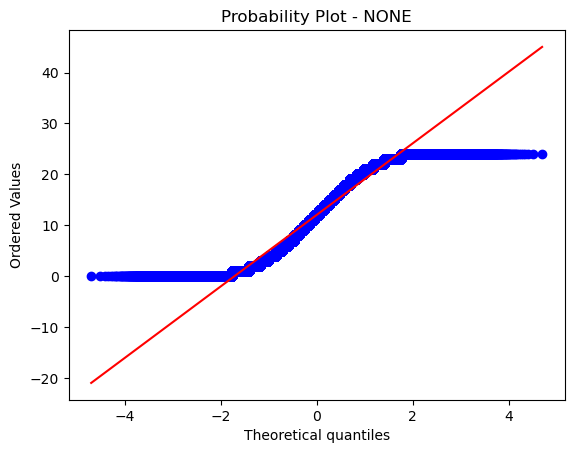

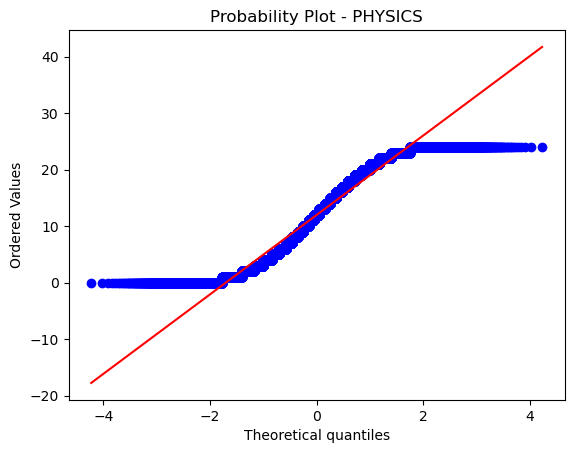

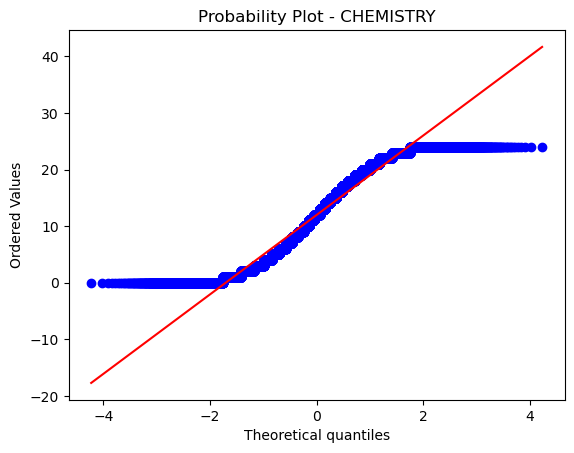

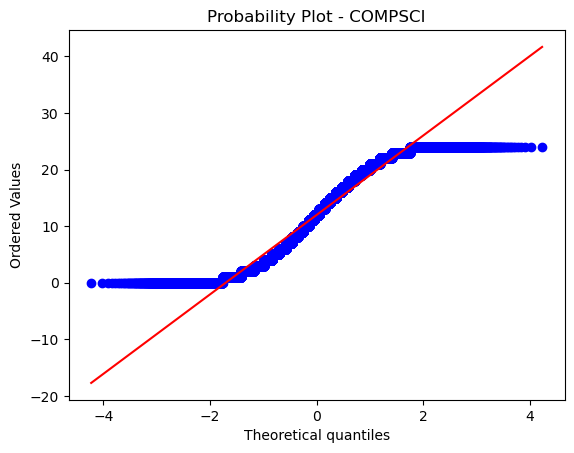

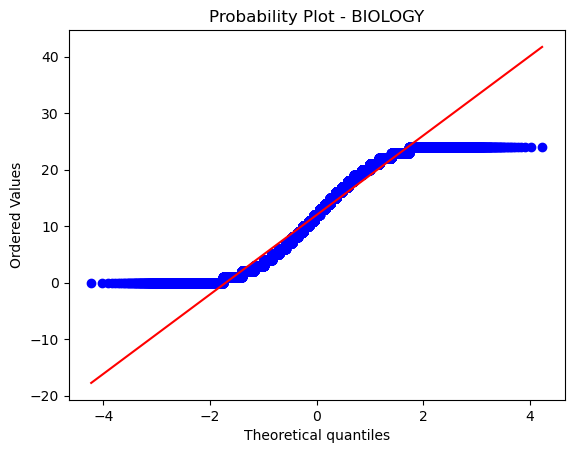

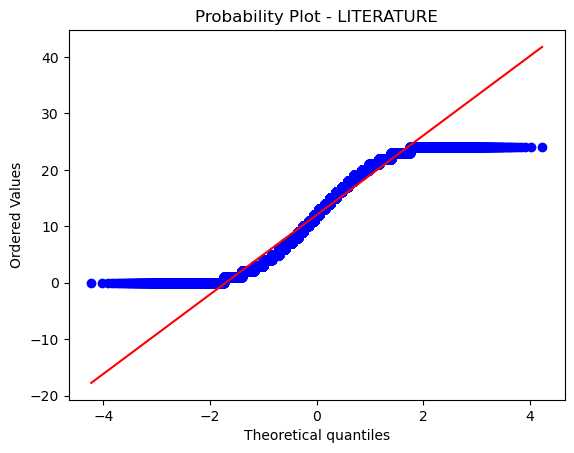

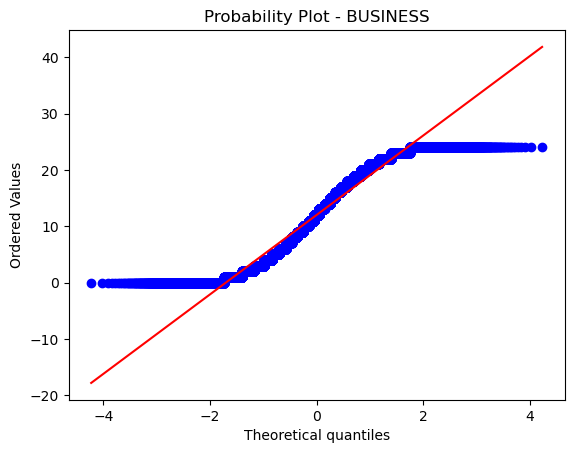

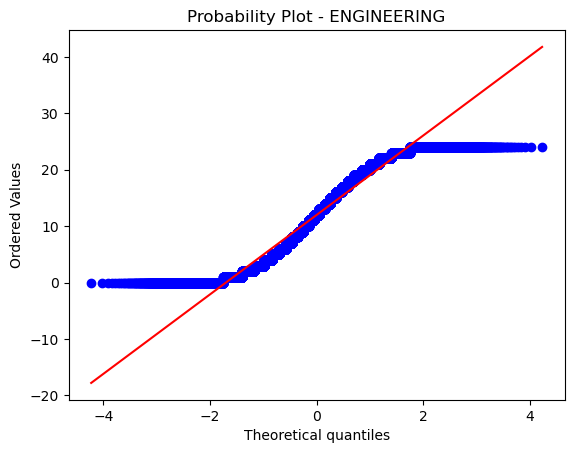

yearsExperience    1.006637
dtype: float64
                                  SS      df         MS         F  P-value  \
Source of Variation                                                          
Between Groups            565.919745       8  70.739968  1.362696  0.20734   
Within Groups         51784004.17274  997539  51.911759                      
Total                51784570.092485  997547   51.91191                      

                       F crit  
Source of Variation            
Between Groups       2.191831  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 1.3626964191505286  and p value is: 0.2073404736822877
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 1.3626964191505286  and critical value is:

In [96]:
# perform anova test on major and yearsExperience

perform_anova_test('major','yearsExperience')


    industry  yearsExperience
0       AUTO           142766
1  EDUCATION           141149
2    FINANCE           142866
3     HEALTH           142736
4        OIL           142770
5    SERVICE           142056
6        WEB           143205


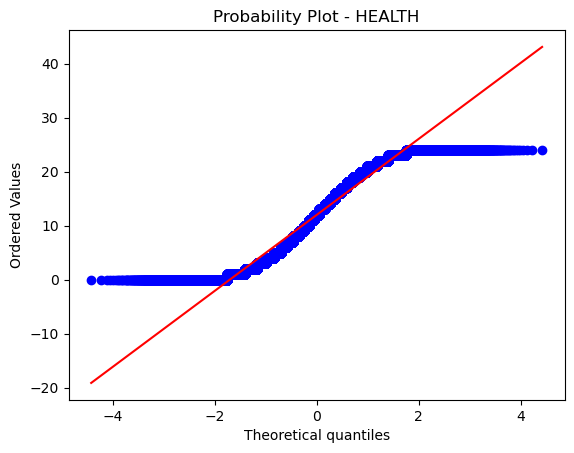

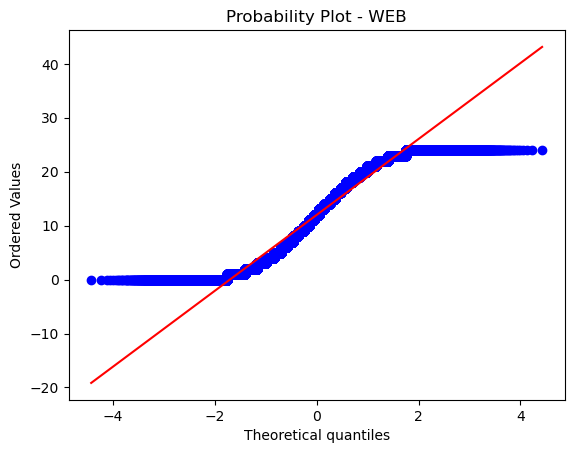

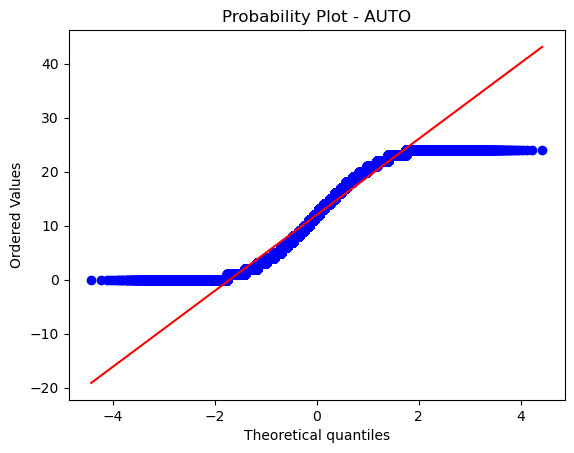

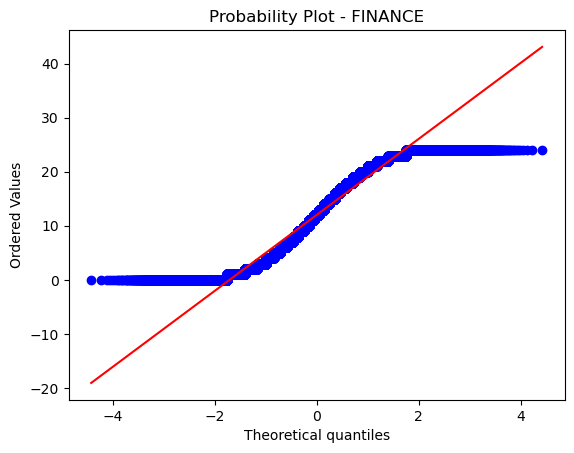

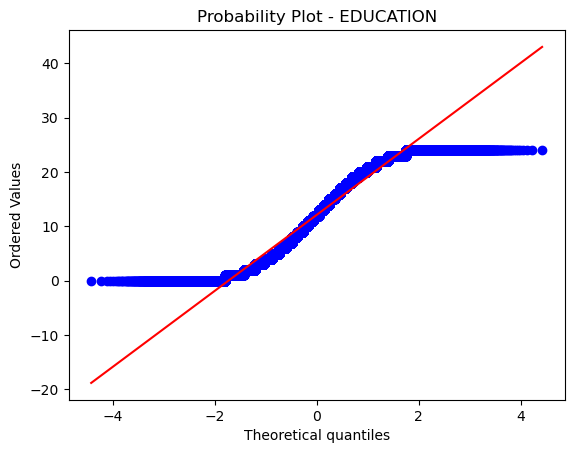

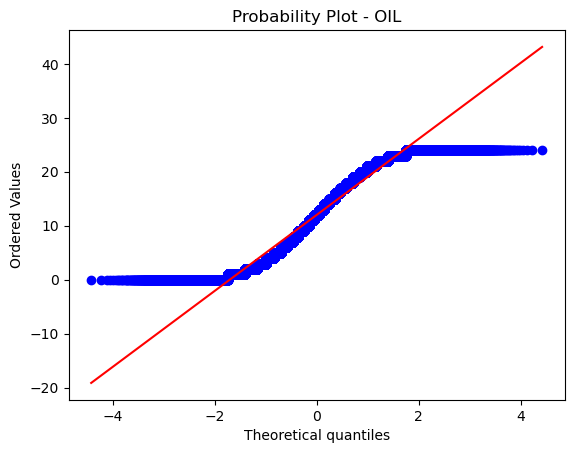

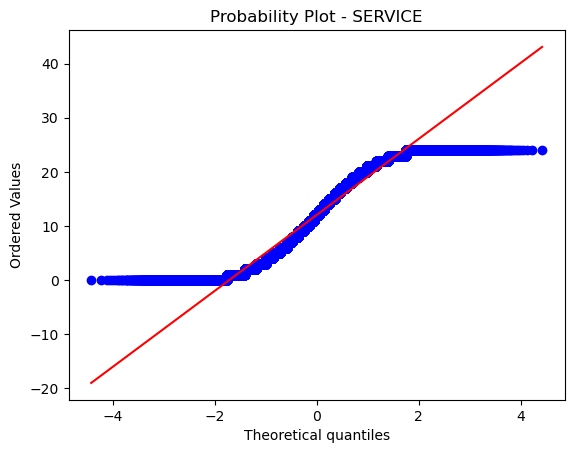

yearsExperience    1.00656
dtype: float64
                                  SS      df          MS         F   P-value  \
Source of Variation                                                            
Between Groups           1692.550226       6  282.091704  5.434191  0.000012   
Within Groups         51782877.54226  997541   51.910526                       
Total                51784570.092486  997547    51.91191                       

                       F crit  
Source of Variation            
Between Groups       2.408242  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 5.4341908776699475  and p value is: 1.249142777282053e-05
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 5.4341908776699475  and critical value 

In [97]:
# perform anova test on industry and yearsExperience
perform_anova_test('industry','yearsExperience')

## Dendrogram

The dendrogram is a visual representation of the compound correlation data. The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes. Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node.

In [101]:
spr = scipy.stats.spearmanr(X)
spr

SpearmanrResult(correlation=array([[ 1.00000000e+00, -2.09111912e-02, -2.43051082e-02,
         1.24724854e-03, -5.58110085e-04,  3.39969804e-03,
        -2.32347543e-01],
       [-2.09111912e-02,  1.00000000e+00,  3.67496616e-01,
        -3.96976894e-03,  5.87025516e-03,  4.35003843e-03,
        -2.34819207e-01],
       [-2.43051082e-02,  3.67496616e-01,  1.00000000e+00,
        -9.07993712e-03, -1.85751319e-03,  7.38458786e-03,
        -2.65814527e-01],
       [ 1.24724854e-03, -3.96976894e-03, -9.07993712e-03,
         1.00000000e+00,  6.06829437e-04,  3.37035439e-03,
         7.54437549e-02],
       [-5.58110085e-04,  5.87025516e-03, -1.85751319e-03,
         6.06829437e-04,  1.00000000e+00,  3.11877393e-03,
         3.60277703e-01],
       [ 3.39969804e-03,  4.35003843e-03,  7.38458786e-03,
         3.37035439e-03,  3.11877393e-03,  1.00000000e+00,
        -2.84521111e-01],
       [-2.32347543e-01, -2.34819207e-01, -2.65814527e-01,
         7.54437549e-02,  3.60277703e-01, -2.8452

In [102]:
corr = np.round(scipy.stats.spearmanr(X).correlation,4)
hc.distance.squareform(1-corr)

array([1.0209, 1.0243, 0.9988, 1.0006, 0.9966, 1.2323, 0.6325, 1.004 ,
       0.9941, 0.9956, 1.2348, 1.0091, 1.0019, 0.9926, 1.2658, 0.9994,
       0.9966, 0.9246, 0.9969, 0.6397, 1.2845])

In [103]:
hc.linkage(hc.distance.squareform(1-corr),method='average')


array([[ 1.        ,  2.        ,  0.6325    ,  2.        ],
       [ 4.        ,  6.        ,  0.6397    ,  2.        ],
       [ 3.        ,  8.        ,  0.962     ,  3.        ],
       [ 5.        ,  7.        ,  0.9941    ,  3.        ],
       [ 0.        , 10.        ,  1.01393333,  4.        ],
       [ 9.        , 11.        ,  1.08495   ,  7.        ]])

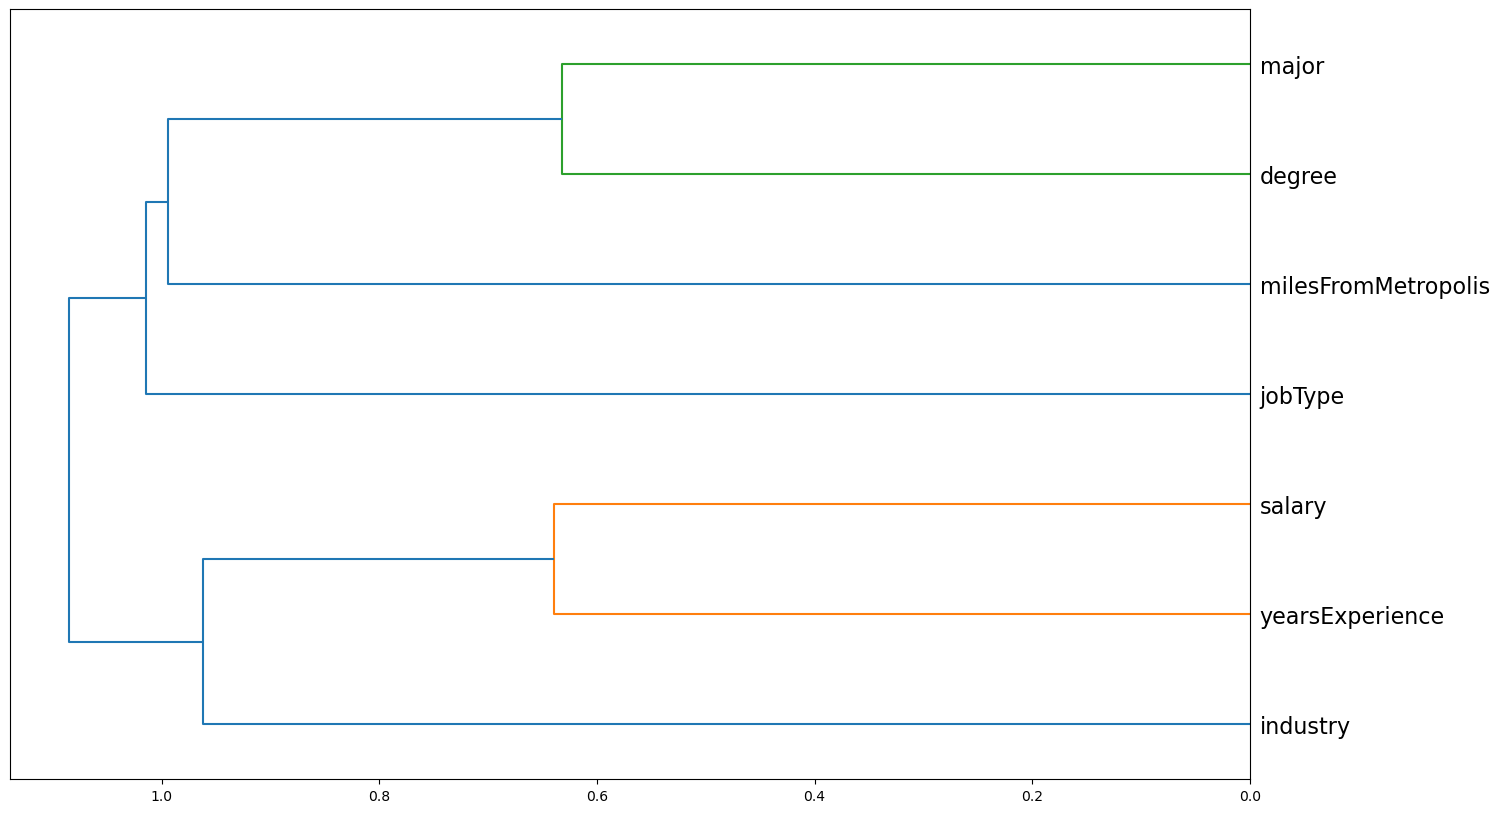

In [99]:
# Plot a Dendrogram on the columns of the dataset (use 50000 sample of 1000000)
X = train_data[1:50000]



import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z,labels=X.columns,orientation='left',leaf_font_size=16)
plt.show()





observation from dendrogram

Strongly correlated variables:
1. major and degree
2. salary and yearsExperience

## Since, there are no missing values and all the data are distributed equally. We can start converting the categoricl values to numerical.

## Scaling

In [104]:
# Helper function for scaling all the numerical data using MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
def scale_data(df,col):
  
  scaler = MinMaxScaler()

  df[col] = scaler.fit_transform(df[col])
  return df

In [105]:
# Making a list of the column names to be scaled 
col_train = ['yearsExperience','milesFromMetropolis']

# passing data and name for scaling
train_data = scale_data(train_data,col_train)



In [106]:
train_data.head()

jobType       degree      major industry  yearsExperience  \
0             CFO      MASTERS       MATH   HEALTH         0.416667   
1             CEO  HIGH_SCHOOL       NONE      WEB         0.125000   
2  VICE_PRESIDENT     DOCTORAL    PHYSICS   HEALTH         0.416667   
3         MANAGER     DOCTORAL  CHEMISTRY     AUTO         0.333333   
4  VICE_PRESIDENT    BACHELORS    PHYSICS  FINANCE         0.333333   

   milesFromMetropolis  salary  
0             0.838384     130  
1             0.737374     101  
2             0.383838     137  
3             0.171717     142  
4             0.161616     163

# Modelling

### One-hot-encoding

A one-hot encoding can be applied to the categorical representation. This is where the categorical variable is removed and a new binary variable is added for each unique categorical value.

In [110]:
# Importing OneHotEncoder for encoding the categorical data
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

# class for containing all functionality required for OneHotEncoding
class OneHotEncoder(SklearnOneHotEncoder):
    
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False
        
    # helper function to fit data  
    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out
    
    # helper function to transform data  
    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns=new_columns, index=X.index)
        return d_out
    
    # helper function to fit and transform data 
    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)
    
    # helper function to get new column names after fitting and tranforming data 
    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}{self.categories_[i][j]}')
                j += 1
        return new_columns

In [107]:
# Split the labels and the target
train_X = train_data.drop(['salary','yearsExperience','milesFromMetropolis'],axis=1)
train_Y = train_data['salary']

In [108]:
# Features

train_X.head()


jobType       degree      major industry
0             CFO      MASTERS       MATH   HEALTH
1             CEO  HIGH_SCHOOL       NONE      WEB
2  VICE_PRESIDENT     DOCTORAL    PHYSICS   HEALTH
3         MANAGER     DOCTORAL  CHEMISTRY     AUTO
4  VICE_PRESIDENT    BACHELORS    PHYSICS  FINANCE

In [109]:
# Target

train_Y.head()

0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

In [111]:
# passing features dataframe for one hot encoding process
encoder = OneHotEncoder()
train_X = encoder.fit_transform(train_X)
train_X = train_X.join(train_data['yearsExperience'])
train_X = train_X.join(train_data['milesFromMetropolis'])
train_X.head()




jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
0         0.0         1.0         0.0             0.0            0.0   
1         1.0         0.0         0.0             0.0            0.0   
2         0.0         0.0         0.0             0.0            0.0   
3         0.0         0.0         0.0             0.0            0.0   
4         0.0         0.0         0.0             0.0            0.0   

   jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
0             0.0            0.0                    0.0              0.0   
1             0.0            0.0                    0.0              0.0   
2             0.0            0.0                    1.0              0.0   
3             1.0            0.0                    0.0              0.0   
4             0.0            0.0                    1.0              1.0   

   degreeDOCTORAL  ...  majorPHYSICS  industryAUTO  industryEDUCATION  \
0             0.0  ...           0.0           0.0                0.0   
1             0.0  ...           0.0           0.0                0.0   
2             1.0  ...           1.0           0.0                0.0   
3             1.0  ...           0.0           1.0                0.0   
4             0.0  ...           1.0           0.0                0.0   

   industryFINANCE  industryHEALTH  industryOIL  industrySERVICE  industryWEB  \
0              0.0             1.0          0.0              0.0          0.0   
1              0.0             0.0          0.0              0.0          1.0   
2              0.0             1.0          0.0              0.0          0.0   
3              0.0             0.0          0.0              0.0          0.0   
4              1.0             0.0          0.0              0.0          0.0   

   yearsExperience  milesFromMetropolis  
0         0.416667             0.838384  
1         0.125000             0.737374  
2         0.416667             0.383838  
3         0.333333             0.171717  
4         0.333333             0.161616  

[5 rows x 31 columns]

In [112]:
#importing Sklearn library for spliting train dataset into train and test dataset(size=0.2)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_X,train_Y,test_size=0.2)

In [113]:
# importing necessary libraries for geting metrics of models
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error

# Function for calculating RMSE 
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())
    


# Function for calculating all the relevant metrics 
def print_score(m):
    res = [rmse(m.predict(X_train),Y_train),rmse(m.predict(X_test),Y_test),
          m.score(X_train,Y_train),m.score(X_test,Y_test),
          median_absolute_error(m.predict(X_train),Y_train),median_absolute_error(m.predict(X_test),Y_test),
          metrics.mean_absolute_error(m.predict(X_train),Y_train),metrics.mean_absolute_error(m.predict(X_test),Y_test)]
  

    print("RMSE-Train: " + str(res[0]) + "\nRMSE-Test: " + str(res[1]) + "\nScore-Train: " + str(res[2]) + "\nScore-Test: " + str(res[3]) +
         "\nMedAE-Train: " + str(res[4]) + "\nMedAE-Test: " + str(res[5]) + "\nMeanAE-Train: " + str(res[6]) + "\nMeanAE-Test: " + str(res[7]),'\n')


In [117]:
# Visualize importance of all the features in the dataset for the prediction

def visualize_importance(feature_importances, feat_train_df):
    
    # creating dataframe for feature name and feature importance
    feature_importance_df = pd.DataFrame() 

    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df,_df],axis=0,ignore_index=True)
    

    # grouping all data and sorting in descending order
    order = feature_importance_df.groupby('column')\
    .sum()[['feature_importance']]\
    .sort_values('feature_importance',ascending=False).index[:50]
    


    
    # ploting feature importance data using boxenplot
    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    sns.boxenplot(data=feature_importance_df,
                 x='feature_importance',
                 y='column',
                 order=order,
                 ax=ax,
                 palette='viridis',
                 orient='h')
    
    ax.tick_params(axis='x',rotation=0)
    ax.set_title('Importances')
    ax.grid()
    fig.tight_layout() 
   
    
    return fig, ax


In [132]:
feat_imp = pd.DataFrame()
_dff = pd.DataFrame()
_dff['feature_importance'] = lModel.coef_
_dff['column'] = train_X.columns
feat_imp = pd.concat([feat_imp,_dff],axis=0,ignore_index=True)
odr = feat_imp.groupby('column')\
    .sum()[['feature_importance']]\
    .sort_values('feature_importance',ascending=False).index[:50]


Index(['industryOIL', 'industryFINANCE', 'industryWEB', 'industryHEALTH',
       'industryAUTO', 'industrySERVICE', 'industryEDUCATION', 'jobTypeCEO',
       'jobTypeCFO', 'jobTypeCTO', 'jobTypeVICE_PRESIDENT', 'jobTypeMANAGER',
       'jobTypeSENIOR', 'jobTypeJUNIOR', 'jobTypeJANITOR', 'yearsExperience',
       'milesFromMetropolis', 'majorENGINEERING', 'majorBUSINESS', 'majorMATH',
       'majorCOMPSCI', 'majorPHYSICS', 'majorCHEMISTRY', 'majorBIOLOGY',
       'majorLITERATURE', 'majorNONE', 'degreeDOCTORAL', 'degreeMASTERS',
       'degreeBACHELORS', 'degreeHIGH_SCHOOL', 'degreeNONE'],
      dtype='object', name='column')

### NOTE:
The employee salaries dataset has 1000000 samples.

We have used only 50000 samples for training.

If you want you can use complete dataset.

Using complete dataset will take longer time to train the model.

### Linear Regression

RMSE-Train: 19.613031050154255
RMSE-Test: 19.683079853298764
Score-Train: 0.7402458886338285
Score-Test: 0.7404326219461224
MedAE-Train: 13.771484375
MedAE-Test: 13.7421875
MeanAE-Train: 15.86028280011024
MeanAE-Test: 15.906659665790562 

Wall time: 1.11 s


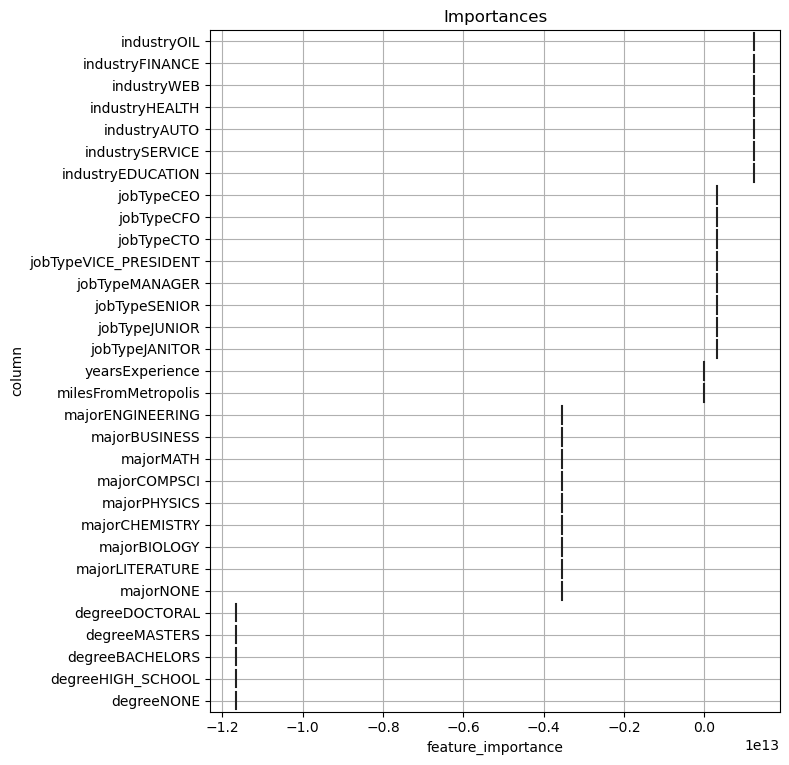

In [118]:
%%time
# Fit a Linear Regression model to the train dataset

# Import LinearRegressor
from sklearn.linear_model import LinearRegression

# Instantiate the model
lModel = LinearRegression()


# Fit the model to the data
lModel.fit(X_train,Y_train)



# print score of the model
print_score(lModel)



# visualizing the inportance of features.
fig, ax = visualize_importance(lModel.coef_,train_X)




### Random Forest Regressor

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity.

RMSE-Train: 20.032467932688768
RMSE-Test: 20.635370504433425
Score-Train: 0.7290170845723569
Score-Test: 0.714708689888439
MedAE-Train: 13.129999999999995
MedAE-Test: 13.919999999999987
MeanAE-Train: 15.824739480725654
MeanAE-Test: 16.47805008756663 

Wall time: 2min


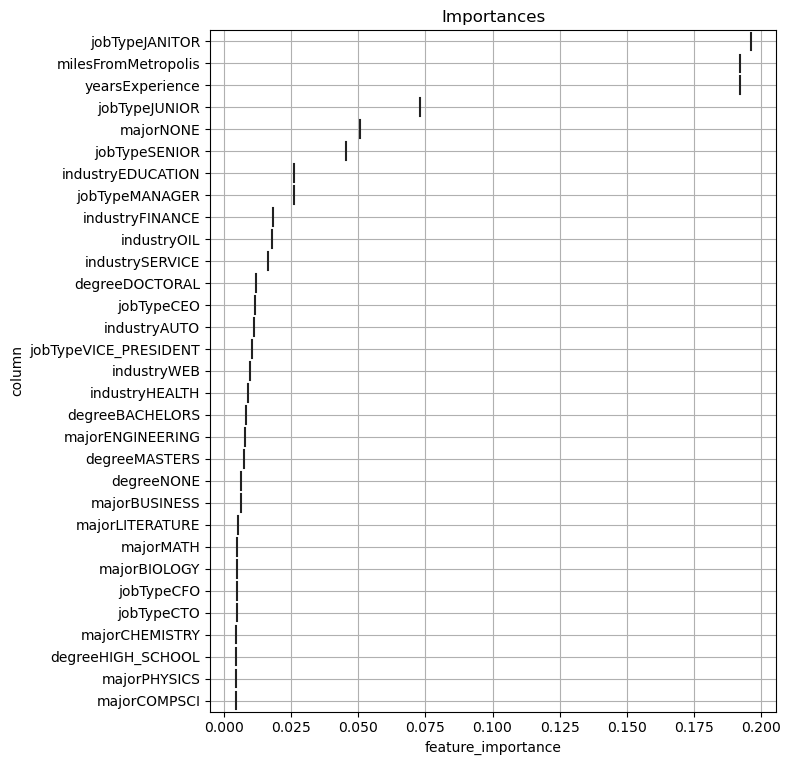

In [133]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Import RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf= RandomForestRegressor()


# Fit the model to the data
rf.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])


# print score of the model
print_score(rf)


# visualizing the inportance of features.
fig, ax = visualize_importance(rf.feature_importances_,train_X.iloc[1:50000])




### KNeighbors Regressor

KNN regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood. The size of the neighbourhood needs to be set by the analyst or can be chosen using cross-validation to select the size that minimises the mean-squared error.

### Note:
For KNN we used only 10000 samples out of 1000000.
You can use complete dataset if you want, it will take longer time to train the model.

In [136]:
%%time
# Fit a K-Neighbour Regressor model to the train dataset

# Import KNeighbourRegressor
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the model
knnr = KNeighborsRegressor()


# print score of the model
knnr.fit(X_train.iloc[1:10000],Y_train.iloc[1:10000])
print_score(knnr)



# print score of the model





RMSE-Train: 23.939309027041517
RMSE-Test: 24.11452892631515
Score-Train: 0.6130131386651754
Score-Test: 0.610397651266217
MedAE-Train: 15.199999999999989
MedAE-Test: 15.200000000000003
MeanAE-Train: 18.62884674664615
MeanAE-Test: 18.741986867826174 

Wall time: 16min 2s


### Gradient Boosting Regressor

Gradient Boosting Algorithm is generally used when we want to decrease the Bias error.
it builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

RMSE-Train: 19.446814954299285
RMSE-Test: 19.50486296527223
Score-Train: 0.7446299497765321
Score-Test: 0.7451117542264936
MedAE-Train: 13.714875779455568
MedAE-Test: 13.703114222601457
MeanAE-Train: 15.72613160028985
MeanAE-Test: 15.750505473481478 

Wall time: 13.2 s


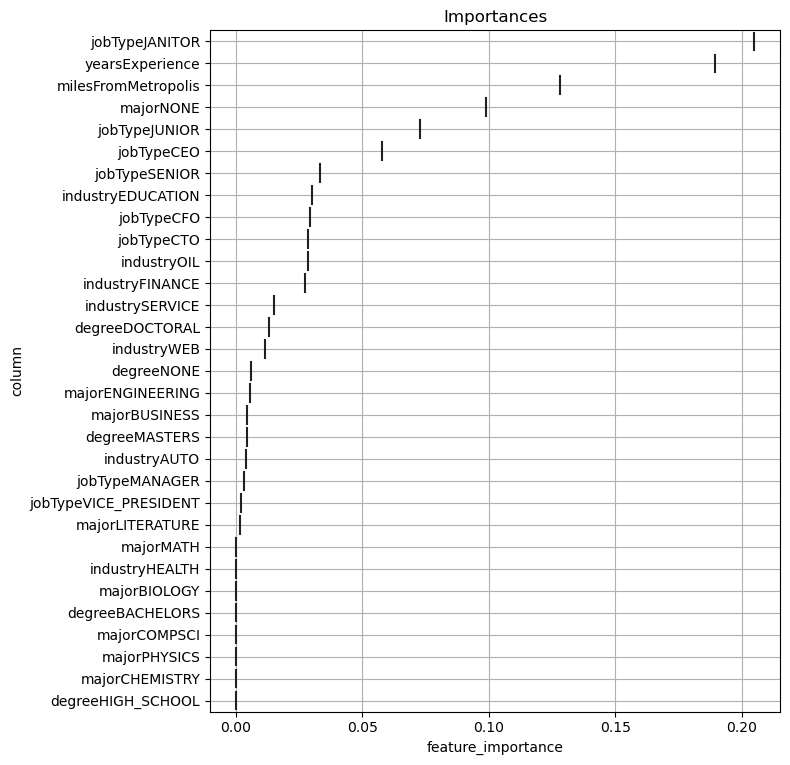

In [137]:
%%time
# Fit a Gradient Boosting Regressor model to the train dataset

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
GBR = GradientBoostingRegressor()

GBR.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])


# print score of the model
print_score(GBR)




# visualizing the inportance of features.
fig, ax = visualize_importance(GBR.feature_importances_,train_X.iloc[1:50000])




### DecisionTree Regressor

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes

In [138]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
DTR = DecisionTreeRegressor()

# Instantiate the model

DTR.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])

# print score of the model
print_score(DTR)



RMSE-Train: 26.9150717589094
RMSE-Test: 27.890876234284153
Score-Train: 0.5108251927363187
Score-Test: 0.47881930767431347
MedAE-Train: 16.0
MedAE-Test: 18.0
MeanAE-Train: 20.32030638474192
MeanAE-Test: 21.73321638013132 

Wall time: 1.92 s


### AdaBoost Regressor

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction

RMSE-Train: 25.059887394131785
RMSE-Test: 25.041277210065118
Score-Train: 0.5759361725268785
Score-Test: 0.5798765208485139
MedAE-Train: 19.146240764884823
MedAE-Test: 19.11100559248706
MeanAE-Train: 20.847163455796597
MeanAE-Test: 20.833339967110785 

Wall time: 37.7 s


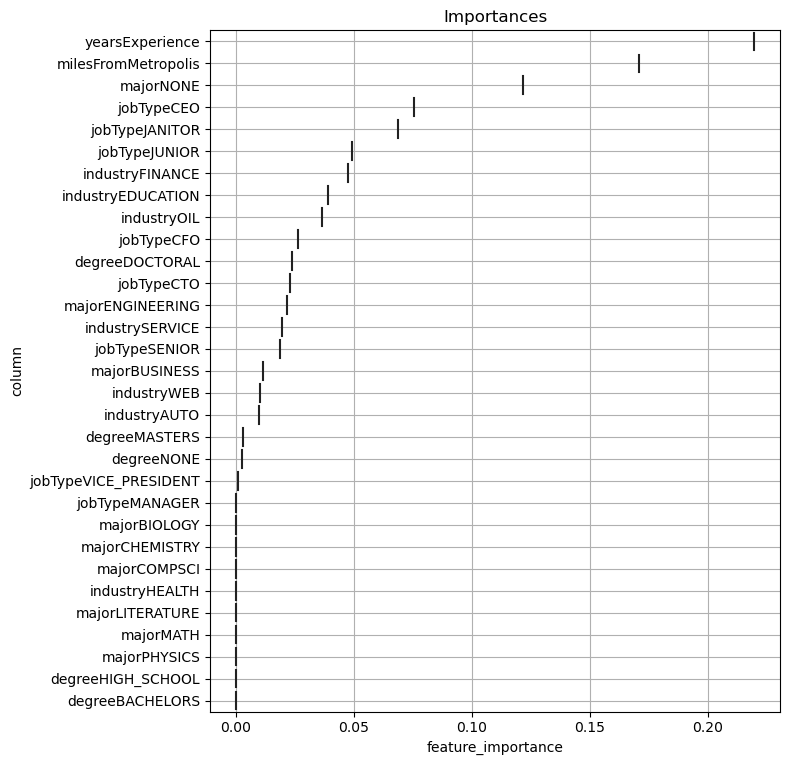

In [139]:
%%time
# Fit a AdaBoost Regressor model to the train dataset

# Import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

# Instantiate the model
AdaBoost = AdaBoostRegressor()


# Instantiate the model

AdaBoost.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])


# print score of the model

print_score(AdaBoost)


# visualizing the inportance of features.
fig, ax = visualize_importance(AdaBoost.feature_importances_,train_X.iloc[1:50000])


### XGBoost

XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

RMSE-Train: 19.30706946956058
RMSE-Test: 19.47922086512385
Score-Train: 0.7482869587223924
Score-Test: 0.7457814922032291
MedAE-Train: 13.46490478515625
MedAE-Test: 13.536937713623047
MeanAE-Train: 15.584627090691232
MeanAE-Test: 15.70787979089839 

Wall time: 12.1 s


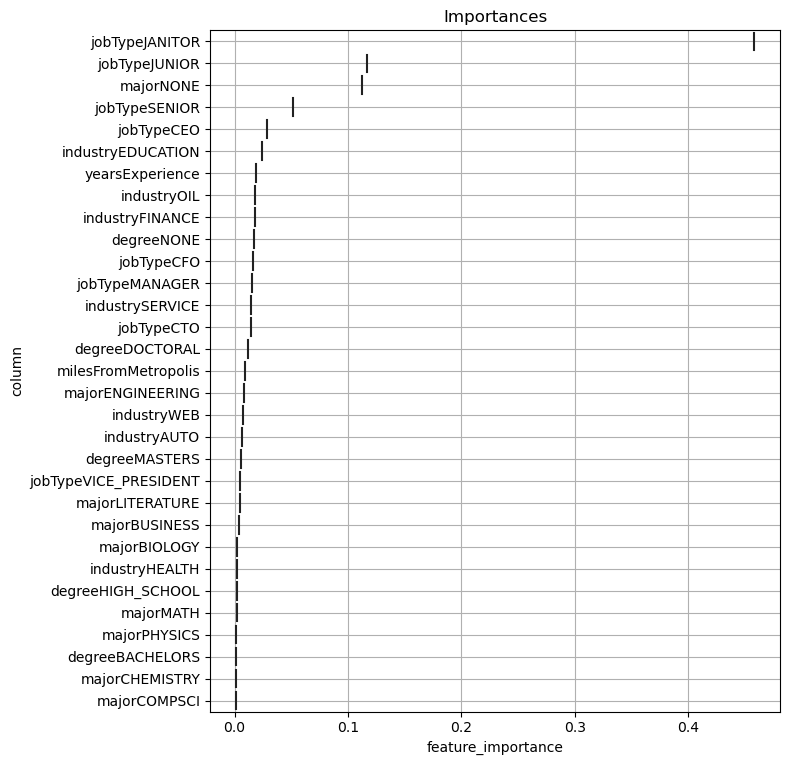

In [144]:
%%time
# Fit a XGB Regressor model to the train dataset

# Import XGBRegressor
from xgboost import XGBRegressor

# Instantiate the model
xgbr = XGBRegressor()


# Fit the model to the data

xgbr.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])


# print score of the model
print_score(xgbr)



# visualizing the inportance of features.
fig, ax = visualize_importance(xgbr.feature_importances_,train_X.iloc[1:50000])



### Light Gradient Boosted Machine

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

RMSE-Train: 19.029289131400294
RMSE-Test: 19.117272451482282
Score-Train: 0.755477893663573
Score-Test: 0.7551411189026618
MedAE-Train: 13.445698621305574
MedAE-Test: 13.421042168459245
MeanAE-Train: 15.43664380136573
MeanAE-Test: 15.486188775377219 

Wall time: 6.03 s


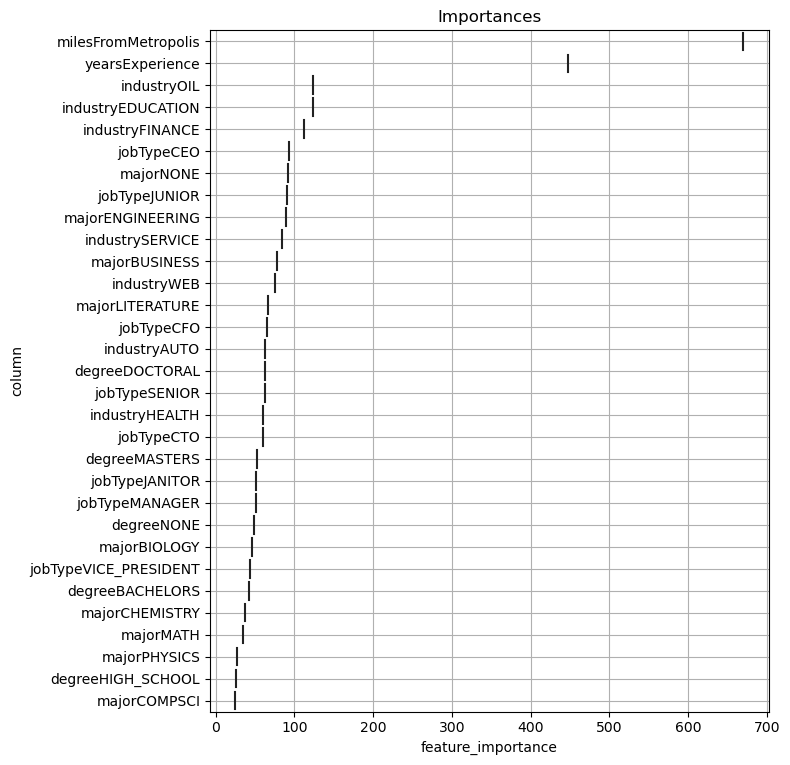

In [147]:
%%time
# Fit a lightgbm Regressor model to the train dataset

# Import lightgbm
import lightgbm as lgbm

# Instantiate the model
lg = lgbm.LGBMRegressor()


# Fit the model to the data
lg.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])


# print score of the model
print_score(lg)

# visualizing the inportance of features.
fig, ax = visualize_importance(lg.feature_importances_,train_X.iloc[1:50000])



### Comparing all the model based on metric

In [148]:
# the libraries we need
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
def compare_models(models,names,X_train,y_train,X_test,y_test):


    # now, create a list with the objects 
    data = {'Metric':['rmse','MedAE','MAE','R-squared']}
    df_train = pd.DataFrame(data)
    df_test = pd.DataFrame(data)

    def rmse(x,y):
      return math.sqrt(((x-y)**2).mean())


    for (model,name) in zip(models,names):
      y_pred= model.predict(X_test) # then predict on the test set
      res = [rmse(model.predict(X_train), y_train),rmse(model.predict(X_test), y_test),
                metrics.median_absolute_error(model.predict(X_train), y_train),metrics.median_absolute_error(model.predict(X_test), y_test),
                metrics.mean_absolute_error(model.predict(X_train), y_train),metrics.mean_absolute_error(model.predict(X_test), y_test),
                metrics.r2_score(model.predict(X_train), y_train),metrics.r2_score(model.predict(X_test), y_test)]
      df_train[name] = [res[0], res[2], res[4], res[6]]
      df_test[name] = [res[1], res[3], res[5], res[7]]
    return df_train,df_test

In [149]:
# list of models object
# list of models name
models= [lg, DTR, rf, knnr, GBR, xgbr, AdaBoost]
names = ['Lr', 'Dtree', 'Forest', 'Knn','GBR', 'Xboost', 'AdaBoost']
comp_model_train,comp_model_test = compare_models(models,names,X_train,Y_train,X_test,Y_test)

#### RMSE of all model on train and test data

In [154]:
# printing rmse comparision of model on train and test
comp_model_train[:1]


Metric         Lr      Dtree     Forest        Knn        GBR     Xboost  \
0   rmse  19.029289  26.915072  20.032468  23.939309  19.446815  19.307069   

    AdaBoost  
0  25.059887

In [153]:
comp_model_test[:1]

Metric         Lr      Dtree     Forest        Knn        GBR     Xboost  \
0   rmse  19.117272  27.890876  20.635371  24.114529  19.504863  19.479221   

    AdaBoost  
0  25.041277

#### All metrics on train and test data

In [155]:
# printing comparision of model on train and test
print("Results of test data: ")
comp_model_test



Results of test data: 


Metric         Lr      Dtree     Forest        Knn        GBR  \
0       rmse  19.117272  27.890876  20.635371  24.114529  19.504863   
1      MedAE  13.421042  18.000000  13.920000  15.200000  13.703114   
2        MAE  15.486189  21.733216  16.478050  18.741987  15.750505   
3  R-squared   0.670666   0.487736   0.630376   0.403274   0.601675   

      Xboost   AdaBoost  
0  19.479221  25.041277  
1  13.536938  19.111006  
2  15.707880  20.833340  
3   0.668412   0.214717

## Hyperparameter Tunning


### RamdomizedSearchCV

In [156]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
  random = RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=20,cv=3,verbose=2,random_state=42,n_jobs=-1)
  random.fit(X_train[1:50000],Y_train[1:50000])
  print(random.best_params_)
  



  

In [157]:
# create parameters dict for tunning
rf_para_grid = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
               'max_features': ['auto', 'sqrt'],
               'max_depth': np.linspace(1, 32, 32, endpoint=True),
               'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv
rf_param_grid = {
    'n_estimators': [1,2,4,8,16,32,64,100,200],
    'max_features': ['auto','sqrt'],
    'max_depth': np.linspace(1,32,32,endpoint=True),
    'min_samples_leaf': np.linspace(0.1,0.5,5,endpoint=True),
    'bootstrap': [True,False]
}

random_Search(RandomForestRegressor(),X_train,Y_train,param_grid=rf_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 27.0, 'bootstrap': False}


In [158]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# create GradientBoostRegressor parameters dict for tunning
GBR_para_grid = {
'n_estimators':  [1, 2, 4, 8, 16, 32, 64, 100, 200], 
 'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
 'max_depth': np.linspace(1, 32, 32, endpoint=True), 
 'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)
}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(GradientBoostingRegressor(),X_train,Y_train,param_grid=GBR_para_grid)





Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_split': 0.1, 'max_depth': 8.0, 'learning_rate': 0.25}


In [159]:
# create DecisionTreeRegressor parameters dict for tunning
DTR_para_grid = {
                  "splitter":["best","random"],
            "max_depth" : np.linspace(1, 32, 32, endpoint=True),
           "min_samples_leaf":np.linspace(0.1, 0.5, 5, endpoint=True),
           "min_weight_fraction_leaf":[0.1,0.2,0.5,0.9],
           "max_features":["auto","log2","sqrt",None],
           }

# passing data for hyper parameter tunning with Randomized search cv

random_Search(DecisionTreeRegressor(),X_train,Y_train,param_grid=DTR_para_grid)




Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'splitter': 'random', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 0.2, 'max_features': None, 'max_depth': 20.0}


In [160]:
from xgboost import XGBRegressor


# create parameters dict for tunning
XGB_para_grid = {
    "learning_rate"    : [0.05, 0.10, 0.15] ,
 "max_depth"        : range(3,10,2),
 "min_child_weight" : range(1,6,2),
 "gamma"            : [ 0.0, 0.1, 0.2 ],
 "colsample_bytree" : [ 0.3, 0.4] 
 }

# passing data for hyper parameter tunning with Randomized search cv


random_Search(XGBRegressor(),X_train,Y_train,param_grid=XGB_para_grid)



Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.4}


## Using the best parameters and training the models

### Random Forest Regressor

RMSE-Train: 30.179229506734618
RMSE-Test: 30.181757402206287
Score-Train: 0.3849799219250254
Score-Test: 0.38968639765313684
MedAE-Train: 20.707792207792338
MedAE-Test: 20.707792207792338
MeanAE-Train: 24.17758946709543
MeanAE-Test: 24.187184704048747 

Wall time: 10.3 s


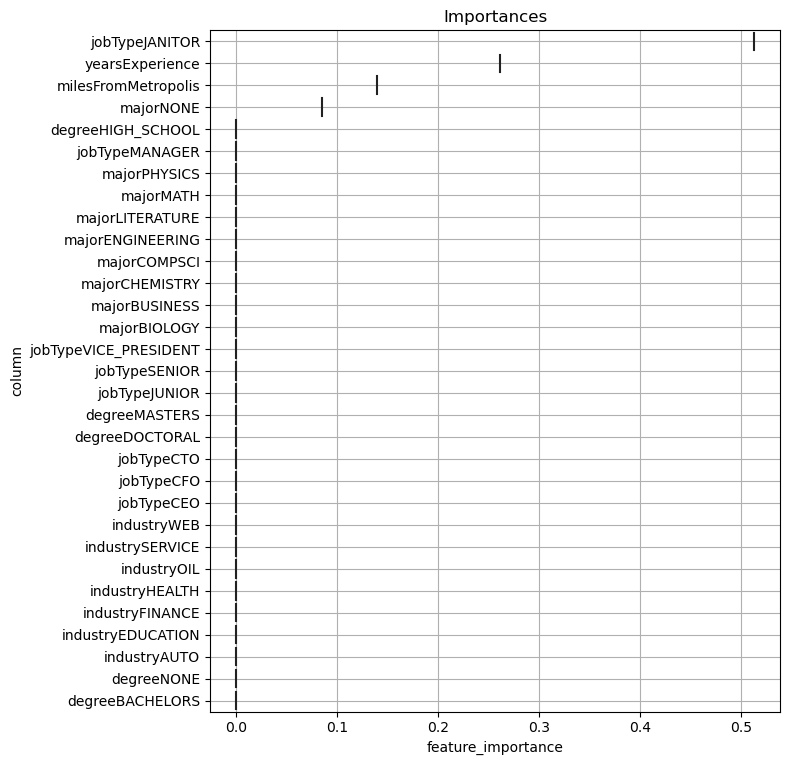

In [163]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Instantiate the model
rf= RandomForestRegressor(n_estimators=64, min_samples_leaf=0.1, max_features='auto', max_depth=27.0, bootstrap=False)



# Fit the model to the data
rf.fit(X_train.iloc[1:10000],Y_train.iloc[1:10000])


# print score of the model
print_score(rf)



# visualizing the inportance of features.
fig, ax = visualize_importance(rf.feature_importances_,train_X.iloc[1:10000])




### Gradient Boosting Regressor

RMSE-Train: 19.12066295925901
RMSE-Test: 19.175741076838953
Score-Train: 0.7531239892984162
Score-Test: 0.753641066503243
MedAE-Train: 13.489175993260524
MedAE-Test: 13.463499995273843
MeanAE-Train: 15.505145213670707
MeanAE-Test: 15.528172777999725 

Wall time: 14.8 s


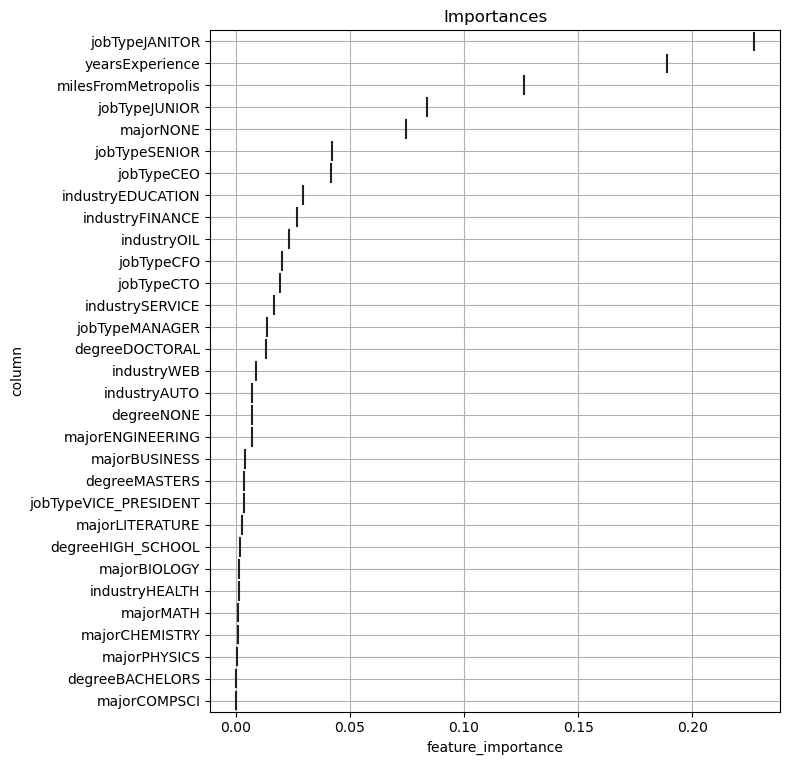

In [164]:
%%time
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Fit a Gradient Boosting Regressor model to the train dataset

# Instantiate the model
GBR = GradientBoostingRegressor(n_estimators=64, min_samples_split=0.1, max_depth=8.0, learning_rate=0.25)


GBR.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])
# print score of the model
print_score(GBR)


# visualizing the inportance of features.
fig, ax = visualize_importance(GBR.feature_importances_,train_X.iloc[1:50000])



### Decision Tree Regrsessor

In [165]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Instantiate the model
DTR = DecisionTreeRegressor(splitter='random', min_weight_fraction_leaf=0.2, min_samples_leaf=0.2, max_features=None, max_depth=20.0)


# Instantiate the model
DTR.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])

# print score of the model
print_score(DTR)



RMSE-Train: 34.61444885096318
RMSE-Test: 34.701708484169494
Score-Train: 0.19092675402427617
Score-Test: 0.19320032295062184
MedAE-Train: 23.986711508489876
MedAE-Test: 24.013288491510124
MeanAE-Train: 27.816130723103978
MeanAE-Test: 27.8812489763107 

Wall time: 497 ms


### XGBoost Regressor

RMSE-Train: 19.041443057016455
RMSE-Test: 19.11555452514471
Score-Train: 0.7551654434674582
Score-Test: 0.7551851241991512
MedAE-Train: 13.441003799438477
MedAE-Test: 13.453075408935547
MeanAE-Train: 15.44380671314418
MeanAE-Test: 15.487971782622186 

Wall time: 4.08 s


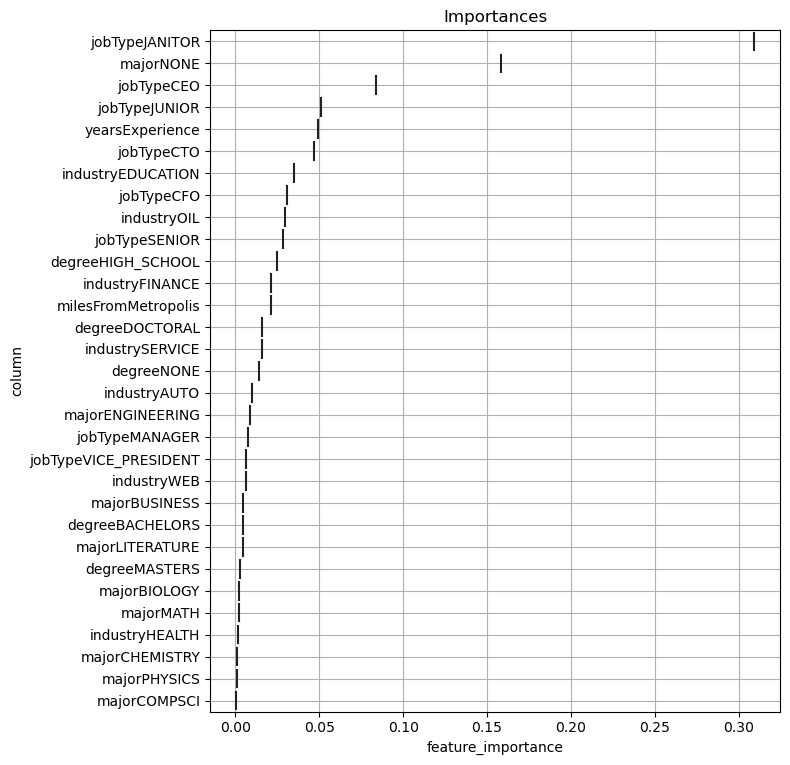

In [166]:
%%time
# Fit a XGB Regressor model to the train dataset

# Instantiate the model
xgbr = XGBRegressor(min_child_weight=3, max_depth=5, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4)


# Fit the model to the data

xgbr.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])


# print score of the model
print_score(xgbr)



# visualizing the inportance of features.
fig, ax = visualize_importance(xgbr.feature_importances_,train_X.iloc[1:50000])




## Comparing the metrics for tuned models

In [167]:
models= [DTR, rf,GBR, xgbr]
names = ['Dtree', 'Forest','GBR', 'Xboost']
comp_model_train,comp_model_test = compare_models(models,names,X_train,Y_train,X_test,Y_test)




In [168]:
print("Metrics on train data")
comp_model_train

Metrics on train data


Metric      Dtree     Forest        GBR     Xboost
0       rmse  34.614449  30.179230  19.120663  19.041443
1      MedAE  23.986712  20.707792  13.489176  13.441004
2        MAE  27.816131  24.177589  15.505145  15.443807
3  R-squared  -3.334175  -0.610432   0.674262   0.668485

In [169]:
print("Metrics on test data")
comp_model_test

Metrics on test data


Metric      Dtree     Forest        GBR     Xboost
0       rmse  34.701708  30.181757  19.175741  19.115555
1      MedAE  24.013288  20.707792  13.463500  13.453075
2        MAE  27.881249  24.187185  15.528173  15.487972
3  R-squared  -3.352909  -0.608503   0.674846   0.668404

### Now working with the test dataset provided

In [170]:
# test data 
test_X = test_data
test_X

jobType       degree    major industry  yearsExperience  \
0              MANAGER  HIGH_SCHOOL     NONE   HEALTH               22   
1               JUNIOR         NONE     NONE     AUTO               20   
2                  CTO      MASTERS  BIOLOGY   HEALTH               17   
3              MANAGER  HIGH_SCHOOL     NONE      OIL               14   
4               JUNIOR     DOCTORAL  BIOLOGY      OIL               10   
...                ...          ...      ...      ...              ...   
999995  VICE_PRESIDENT    BACHELORS     MATH      OIL               14   
999996         MANAGER         NONE     NONE   HEALTH               20   
999997         JANITOR         NONE     NONE      OIL                1   
999998             CTO     DOCTORAL     MATH      OIL               14   
999999          JUNIOR         NONE     NONE      OIL               16   

        milesFromMetropolis  
0                        73  
1                        47  
2                         9  
3                        96  
4                        44  
...                     ...  
999995                    3  
999996                   67  
999997                   91  
999998                   63  
999999                   31  

[1000000 rows x 6 columns]

In [171]:
# passing test data for scaling
col_test = ['yearsExperience','milesFromMetropolis']
test_X = scale_data(test_X,col_test)



In [175]:
# passing test dataset for one hot encoding process
encoder = OneHotEncoder()
test_drop = test_X.drop(['jobType','degree','major','industry'],axis=1)
test_X = encoder.fit_transform(test_X.drop(['yearsExperience','milesFromMetropolis'],axis=1))

test_X = test_X.join(test_drop['yearsExperience'])
test_X = test_X.join(test_drop['milesFromMetropolis'])
test_X.head()




jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
0         0.0         0.0         0.0             0.0            0.0   
1         0.0         0.0         0.0             0.0            1.0   
2         0.0         0.0         1.0             0.0            0.0   
3         0.0         0.0         0.0             0.0            0.0   
4         0.0         0.0         0.0             0.0            1.0   

   jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
0             1.0            0.0                    0.0              0.0   
1             0.0            0.0                    0.0              0.0   
2             0.0            0.0                    0.0              0.0   
3             1.0            0.0                    0.0              0.0   
4             0.0            0.0                    0.0              0.0   

   degreeDOCTORAL  ...  majorPHYSICS  industryAUTO  industryEDUCATION  \
0             0.0  ...           0.0           0.0                0.0   
1             0.0  ...           0.0           1.0                0.0   
2             0.0  ...           0.0           0.0                0.0   
3             0.0  ...           0.0           0.0                0.0   
4             1.0  ...           0.0           0.0                0.0   

   industryFINANCE  industryHEALTH  industryOIL  industrySERVICE  industryWEB  \
0              0.0             1.0          0.0              0.0          0.0   
1              0.0             0.0          0.0              0.0          0.0   
2              0.0             1.0          0.0              0.0          0.0   
3              0.0             0.0          1.0              0.0          0.0   
4              0.0             0.0          1.0              0.0          0.0   

   yearsExperience  milesFromMetropolis  
0         0.916667             0.737374  
1         0.833333             0.474747  
2         0.708333             0.090909  
3         0.583333             0.969697  
4         0.416667             0.444444  

[5 rows x 31 columns]

In [176]:
# Perforn the prediction on the test dataset
y_predicted = GBR.predict(test_X)
y_predicted





array([114.60015591,  94.43715837, 177.30481376, ...,  56.68240141,
       161.93939511, 115.50031755])

In [177]:
# creating a dataframe of predicted results 
predictions = pd.DataFrame(y_predicted)



In [178]:
# predicted values in dataframe

predictions

0
0       114.600156
1        94.437158
2       177.304814
3       104.796834
4       111.067757
...            ...
999995  171.980817
999996  106.889981
999997   56.682401
999998  161.939395
999999  115.500318

[1000000 rows x 1 columns]

**Business Problem:**

In [191]:
### we take same samples provided my the manager so that we can explain him the difference between the salary the person should be getting as the salary the person
sample = train_data.sample(100)
sample



jobType       degree       major   industry  yearsExperience  \
151433  VICE_PRESIDENT         NONE        NONE    FINANCE         0.625000   
596246         MANAGER  HIGH_SCHOOL        NONE    SERVICE         0.250000   
503283         MANAGER    BACHELORS  LITERATURE     HEALTH         0.416667   
757149             CEO         NONE        NONE    FINANCE         0.000000   
225400  VICE_PRESIDENT     DOCTORAL     PHYSICS        OIL         0.708333   
...                ...          ...         ...        ...              ...   
4984    VICE_PRESIDENT     DOCTORAL    BUSINESS        WEB         0.041667   
752911         MANAGER    BACHELORS        MATH  EDUCATION         0.250000   
173934             CTO    BACHELORS  LITERATURE    SERVICE         0.750000   
814467         MANAGER    BACHELORS     BIOLOGY    SERVICE         0.208333   
55516           JUNIOR      MASTERS     PHYSICS    FINANCE         0.333333   

        milesFromMetropolis  salary  
151433             0.373737     144  
596246             0.787879      61  
503283             0.333333      97  
757149             0.181818     168  
225400             1.000000     112  
...                     ...     ...  
4984               0.979798     103  
752911             0.282828      99  
173934             0.222222     123  
814467             0.000000     107  
55516              1.000000     111  

[100 rows x 7 columns]

In [193]:
train_cat = sample.iloc[:,0:4]   #categorical variables for sample

#encodind the samples
encoder = OneHotEncoder()
train_X = encoder.fit_transform(train_cat)

#processing the sample data
train = train_X.join(sample.iloc[:,4:])

#taking those samples whose salary is very less i.e the reason for employee resigning
sample = train[train['salary']<60]




#Preparing the x and y values
x_sample = sample.drop('salary',axis=1)
y_sample = sample['salary']



# passing test data for scaling
col_test = ['yearsExperience','milesFromMetropolis']
sample_x = scale_data(x_sample,col_test)
sample_x




jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
771728         0.0         0.0         0.0             0.0            1.0   
964133         0.0         0.0         0.0             0.0            0.0   
837869         0.0         0.0         0.0             0.0            1.0   
553694         0.0         0.0         0.0             1.0            0.0   
78292          0.0         0.0         0.0             1.0            0.0   

        jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
771728             0.0            0.0                    0.0              0.0   
964133             0.0            1.0                    0.0              1.0   
837869             0.0            0.0                    0.0              0.0   
553694             0.0            0.0                    0.0              0.0   
78292              0.0            0.0                    0.0              0.0   

        degreeDOCTORAL  ...  majorPHYSICS  industryAUTO  industryEDUCATION  \
771728             0.0  ...           0.0           0.0                1.0   
964133             0.0  ...           1.0           0.0                1.0   
837869             0.0  ...           0.0           0.0                0.0   
553694             0.0  ...           0.0           0.0                0.0   
78292              0.0  ...           0.0           1.0                0.0   

        industryFINANCE  industryHEALTH  industryOIL  industrySERVICE  \
771728              0.0             0.0          0.0              0.0   
964133              0.0             0.0          0.0              0.0   
837869              0.0             0.0          0.0              0.0   
553694              0.0             0.0          1.0              0.0   
78292               0.0             0.0          0.0              0.0   

        industryWEB  yearsExperience  milesFromMetropolis  
771728          0.0         0.454545                0.000  
964133          0.0         0.545455                0.850  
837869          1.0         0.000000                0.525  
553694          0.0         1.000000                1.000  
78292           0.0         0.454545                0.200  

[5 rows x 31 columns]

In [206]:
len(sample_x.columns)

31

In [204]:
missing_value = set(sample_x.columns) - set(test_X.columns)

print(missing_value)


set()


In [207]:
#predicting the sample
predicted_out = GBR.predict(sample_x)
predicted_out



array([86.33318679, 72.97332853, 66.43029979, 81.04955697, 73.86831574])

In [208]:
y_sample  #Real values

771728    50
964133    59
837869    46
553694    54
78292     43
Name: salary, dtype: int64

In [279]:
def predict_case(indexCols,model):
    #a dictionary to map indices
    indices = dict()
    i=0
    for x in indexCols:
        d[x] = i
        i+=1
   #dict to store query from user
    query = dict()
    keys = ['jobType','degree','major','industry','yearsExperience','milesFromMetropolis']
    for key in keys:
        if key not in ['yearsExperience','milesFromMetropolis']:
            query[key] = input("Enter {k} :".format(k=key)).upper()
        else:
            query[key] = float(input("Enter {k} :".format(k=key)))
    
    #list containing concatinated string values to map with indices dictionary
    queryList = list()
    for k,v in query.items():
        if k not in ['yearsExperience','milesFromMetropolis']:
            queryList.append(k+v)
        else:
            queryList.append(v)
    
    caseList = [0]*31
    for i in queryList[:-2]: #only categorical
        caseList[d[i]] = 1.0 #onehotencoded
    caseList[-2:] = queryList[-2:]
    
    case = pd.DataFrame(caseList).transpose()
    case.columns = sample_x.columns
    
    result = model.predict(case)
    print("\nExpected Salary: ",round(result[0])," dollars!")
        

In [280]:
predict_case(sample_x.columns,GBR)

Enter jobType :MANAGER
Enter degree :MASTERS
Enter major :BUSINESS
Enter industry :HEALTH
Enter yearsExperience :15
Enter milesFromMetropolis :4

Expected Salary:  117  dollars!


## **`CONCLUSION`**:
According to this model, the predicted value we got,
matches with the actual target values. Does the model is performing well.
Even though we use only 50000 samples, the model may perform much better when trained on complete dataset.
We have performed EDA, preprocessing, buid different models, visualized feature importance, did hyper parameter tunning of each model and did prediction.